In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
train = pd.read_csv('./data/bike/train.csv')
test = pd.read_csv('./data/bike/test.csv')
submission = pd.read_csv('./data/bike/sampleSubmission.csv')

In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [5]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

(None, None)

In [6]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


In [7]:
train.loc[(train['casual']+train['registered']!=train['count']),:]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [8]:
train.loc[(train['casual']+train['registered']==train['count']),:]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [9]:
train.rename(columns={'datetime':'rdate'}, inplace = True)
test.rename(columns={'datetime':'rdate'}, inplace = True)

In [10]:
train.head()

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
test.head()

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


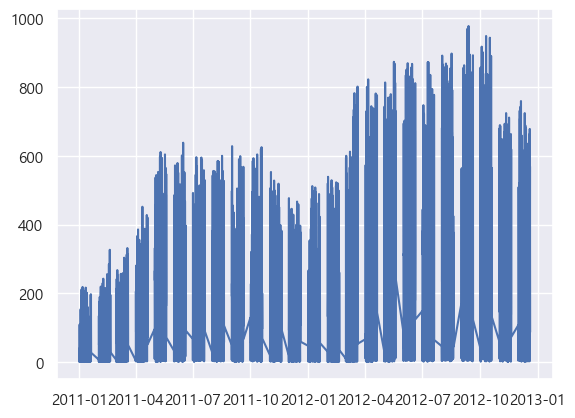

In [12]:
plt.plot(train['rdate'].astype('datetime64[ns]'),train['count'])

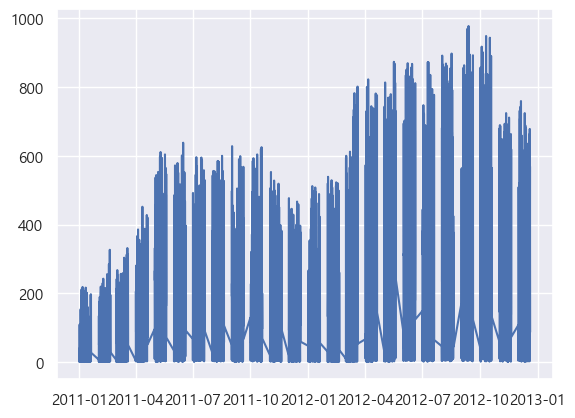

In [13]:
plt.plot(pd.to_datetime(train['rdate'], format='%Y-%m-%d %H:%M:%S'),train['count'])

In [14]:
## read_csv(parse_dates=['column'...])


In [15]:
train['rdate'] = pd.to_datetime(train['rdate'], format='%Y-%m-%d %H:%M:%S')
test['rdate'] = pd.to_datetime(test['rdate'], format='%Y-%m-%d %H:%M:%S')

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rdate       6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rdate       10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


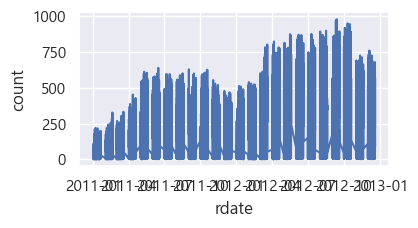

In [18]:
plt.figure(figsize = (4, 2))
sns.lineplot(data=train, x='rdate', y='count', errorbar=None)
plt.show()

In [19]:
expected_range = pd.date_range(start=train['rdate'].min(), end=train['rdate'].max(), freq='h') # 'D'는 일별, 'H'는 시간별
# 실제 데이터의 개수와 비교
print(f"이론상 개수: {len(expected_range)}")
print(f"실제 데이터 개수: {train['rdate'].nunique()}")

if len(expected_range) != train['rdate'].nunique():
    print("⚠️ 경고: 누락된 시간대가 존재합니다.")

이론상 개수: 17256
실제 데이터 개수: 10886
⚠️ 경고: 누락된 시간대가 존재합니다.


In [20]:
train.head()

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
traincp = train.copy()

In [22]:
traincp = traincp.set_index('rdate')


In [23]:
traincp

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
rdate,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [24]:
traincp = traincp.reset_index()
traincp

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [25]:
traincp = traincp.set_index('rdate')


In [26]:
pd.DataFrame({
    'rdate': train['rdate'],
    'year': train['rdate'].dt.year,
    'month': train['rdate'].dt.month,
    'week': train['rdate'].dt.isocalendar().week,
    'day': train['rdate'].dt.day,
    'hour': train['rdate'].dt.hour,
    'weekday': train['rdate'].dt.weekday,
    'dayofweek': train['rdate'].dt.dayofweek
})

,rdate,year,month,week,day,hour,weekday,dayofweek
0,2011-01-01 00:00:00,2011,1,52,1,0,5,5
1,2011-01-01 01:00:00,2011,1,52,1,1,5,5
2,2011-01-01 02:00:00,2011,1,52,1,2,5,5
3,2011-01-01 03:00:00,2011,1,52,1,3,5,5
4,2011-01-01 04:00:00,2011,1,52,1,4,5,5
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,51,19,19,2,2
10882,2012-12-19 20:00:00,2012,12,51,19,20,2,2
10883,2012-12-19 21:00:00,2012,12,51,19,21,2,2
10884,2012-12-19 22:00:00,2012,12,51,19,22,2,2


In [28]:
train['year'] = train['rdate'].dt.year
train['month'] = train['rdate'].dt.month
train['week'] = train['rdate'].dt.isocalendar().week
train['day'] = train['rdate'].dt.day
train['hour'] = train['rdate'].dt.hour
train['weekday'] = train['rdate'].dt.weekday
train['dayofweek'] = train['rdate'].dt.dayofweek

In [30]:
test['year'] = test['rdate'].dt.year
test['month'] = test['rdate'].dt.month
test['week'] = test['rdate'].dt.isocalendar().week
test['day'] = test['rdate'].dt.day
test['hour'] = test['rdate'].dt.hour
test['weekday'] = test['rdate'].dt.weekday
test['dayofweek'] = test['rdate'].dt.dayofweek

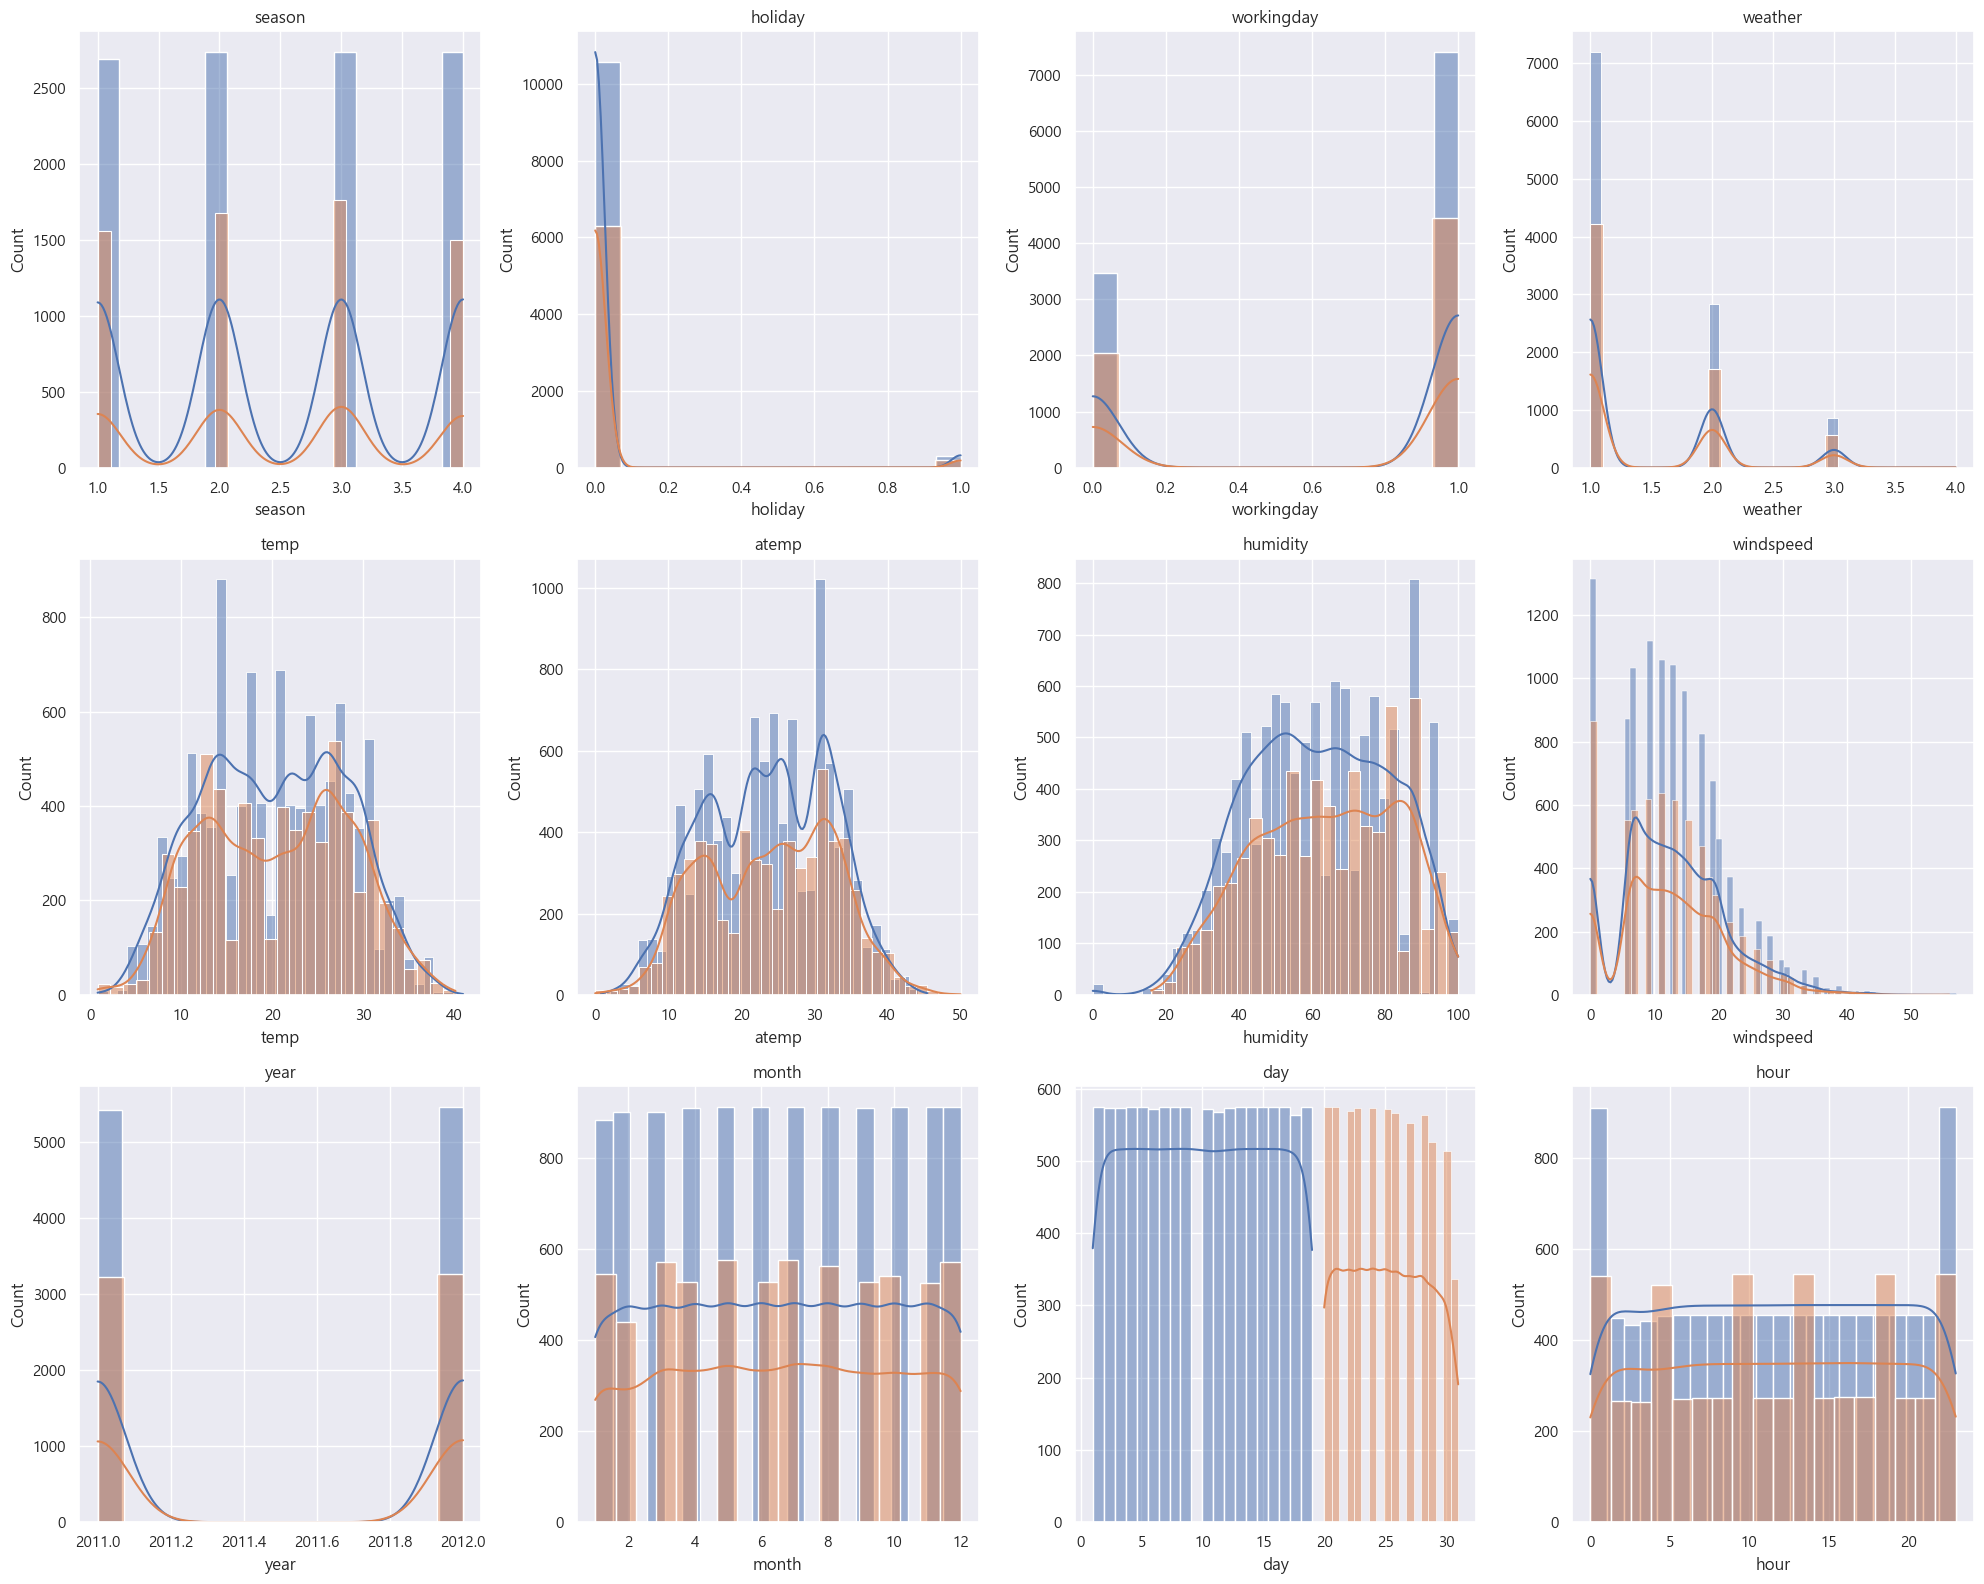

In [32]:
fig, axes = plt.subplots(3, 4, figsize=(20, 16)  )
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','year', 'month', 'day','hour']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c],     kde=True )
    sns.histplot(data=test, x=col, ax=axes[r][c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rdate       10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  week        10886 non-null  UInt32        
 15  day         10886 non-null  int32         
 16  hour        10886 non-

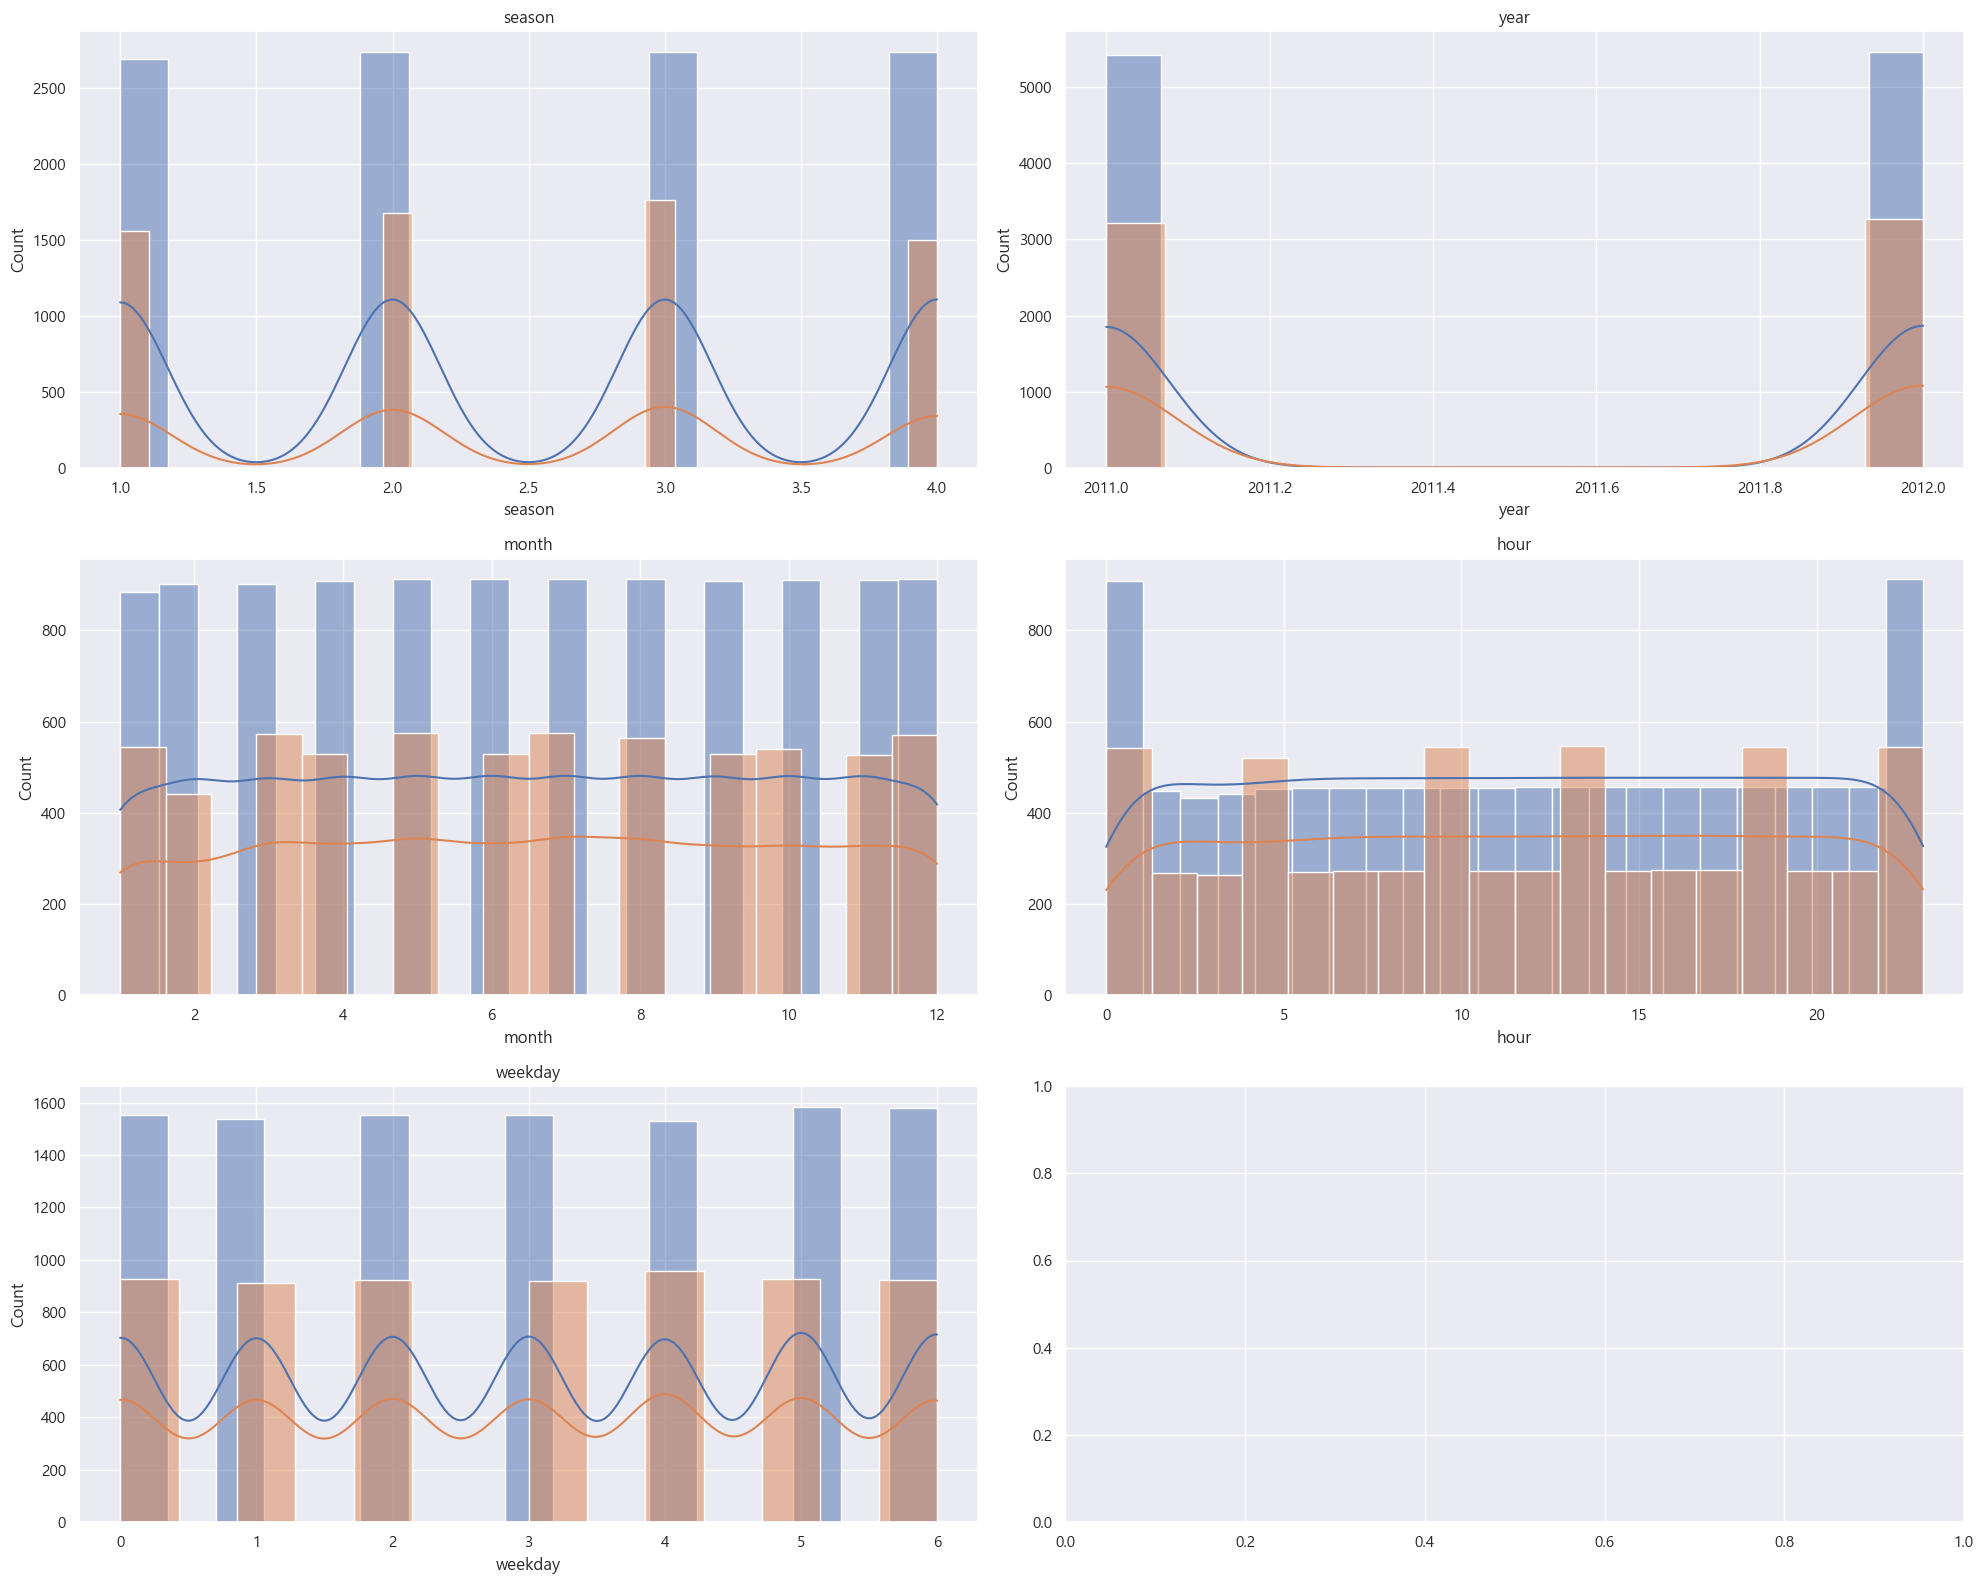

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16)  )
col_list = ['season', 'year', 'month','hour', 'weekday']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c],     kde=True )
    sns.histplot(data=test, x=col, ax=axes[r][c],     kde=True )
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

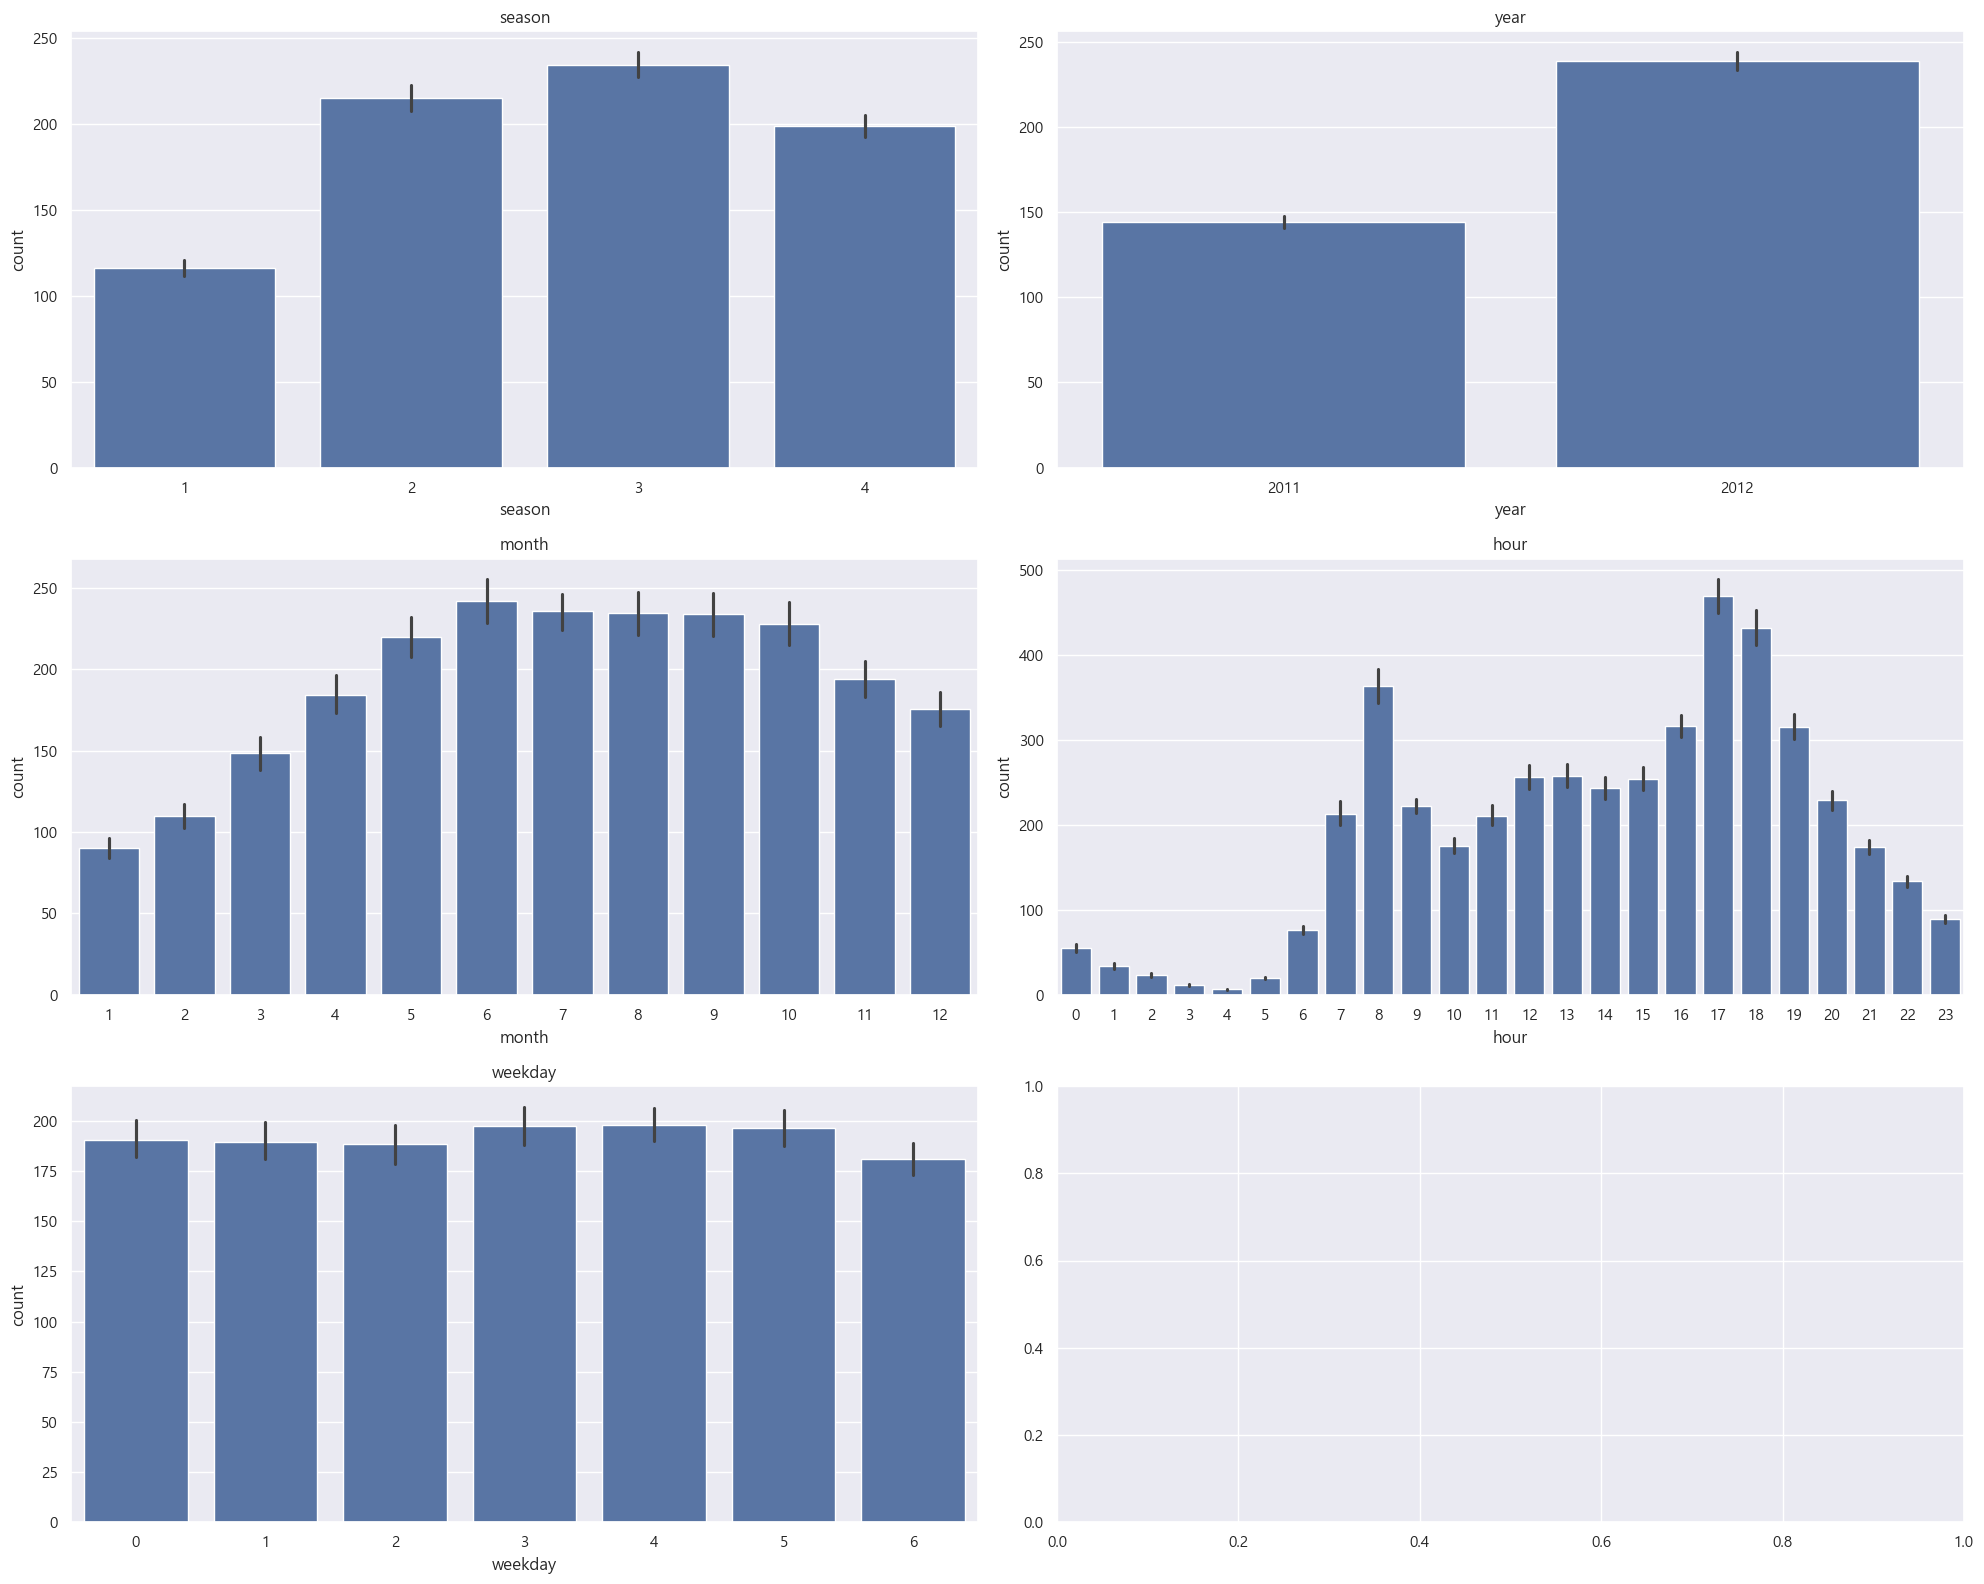

In [38]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16)  )
col_list = ['season', 'year', 'month','hour', 'weekday']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.barplot(data=train, x=col, y='count',ax=axes[r][c])
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

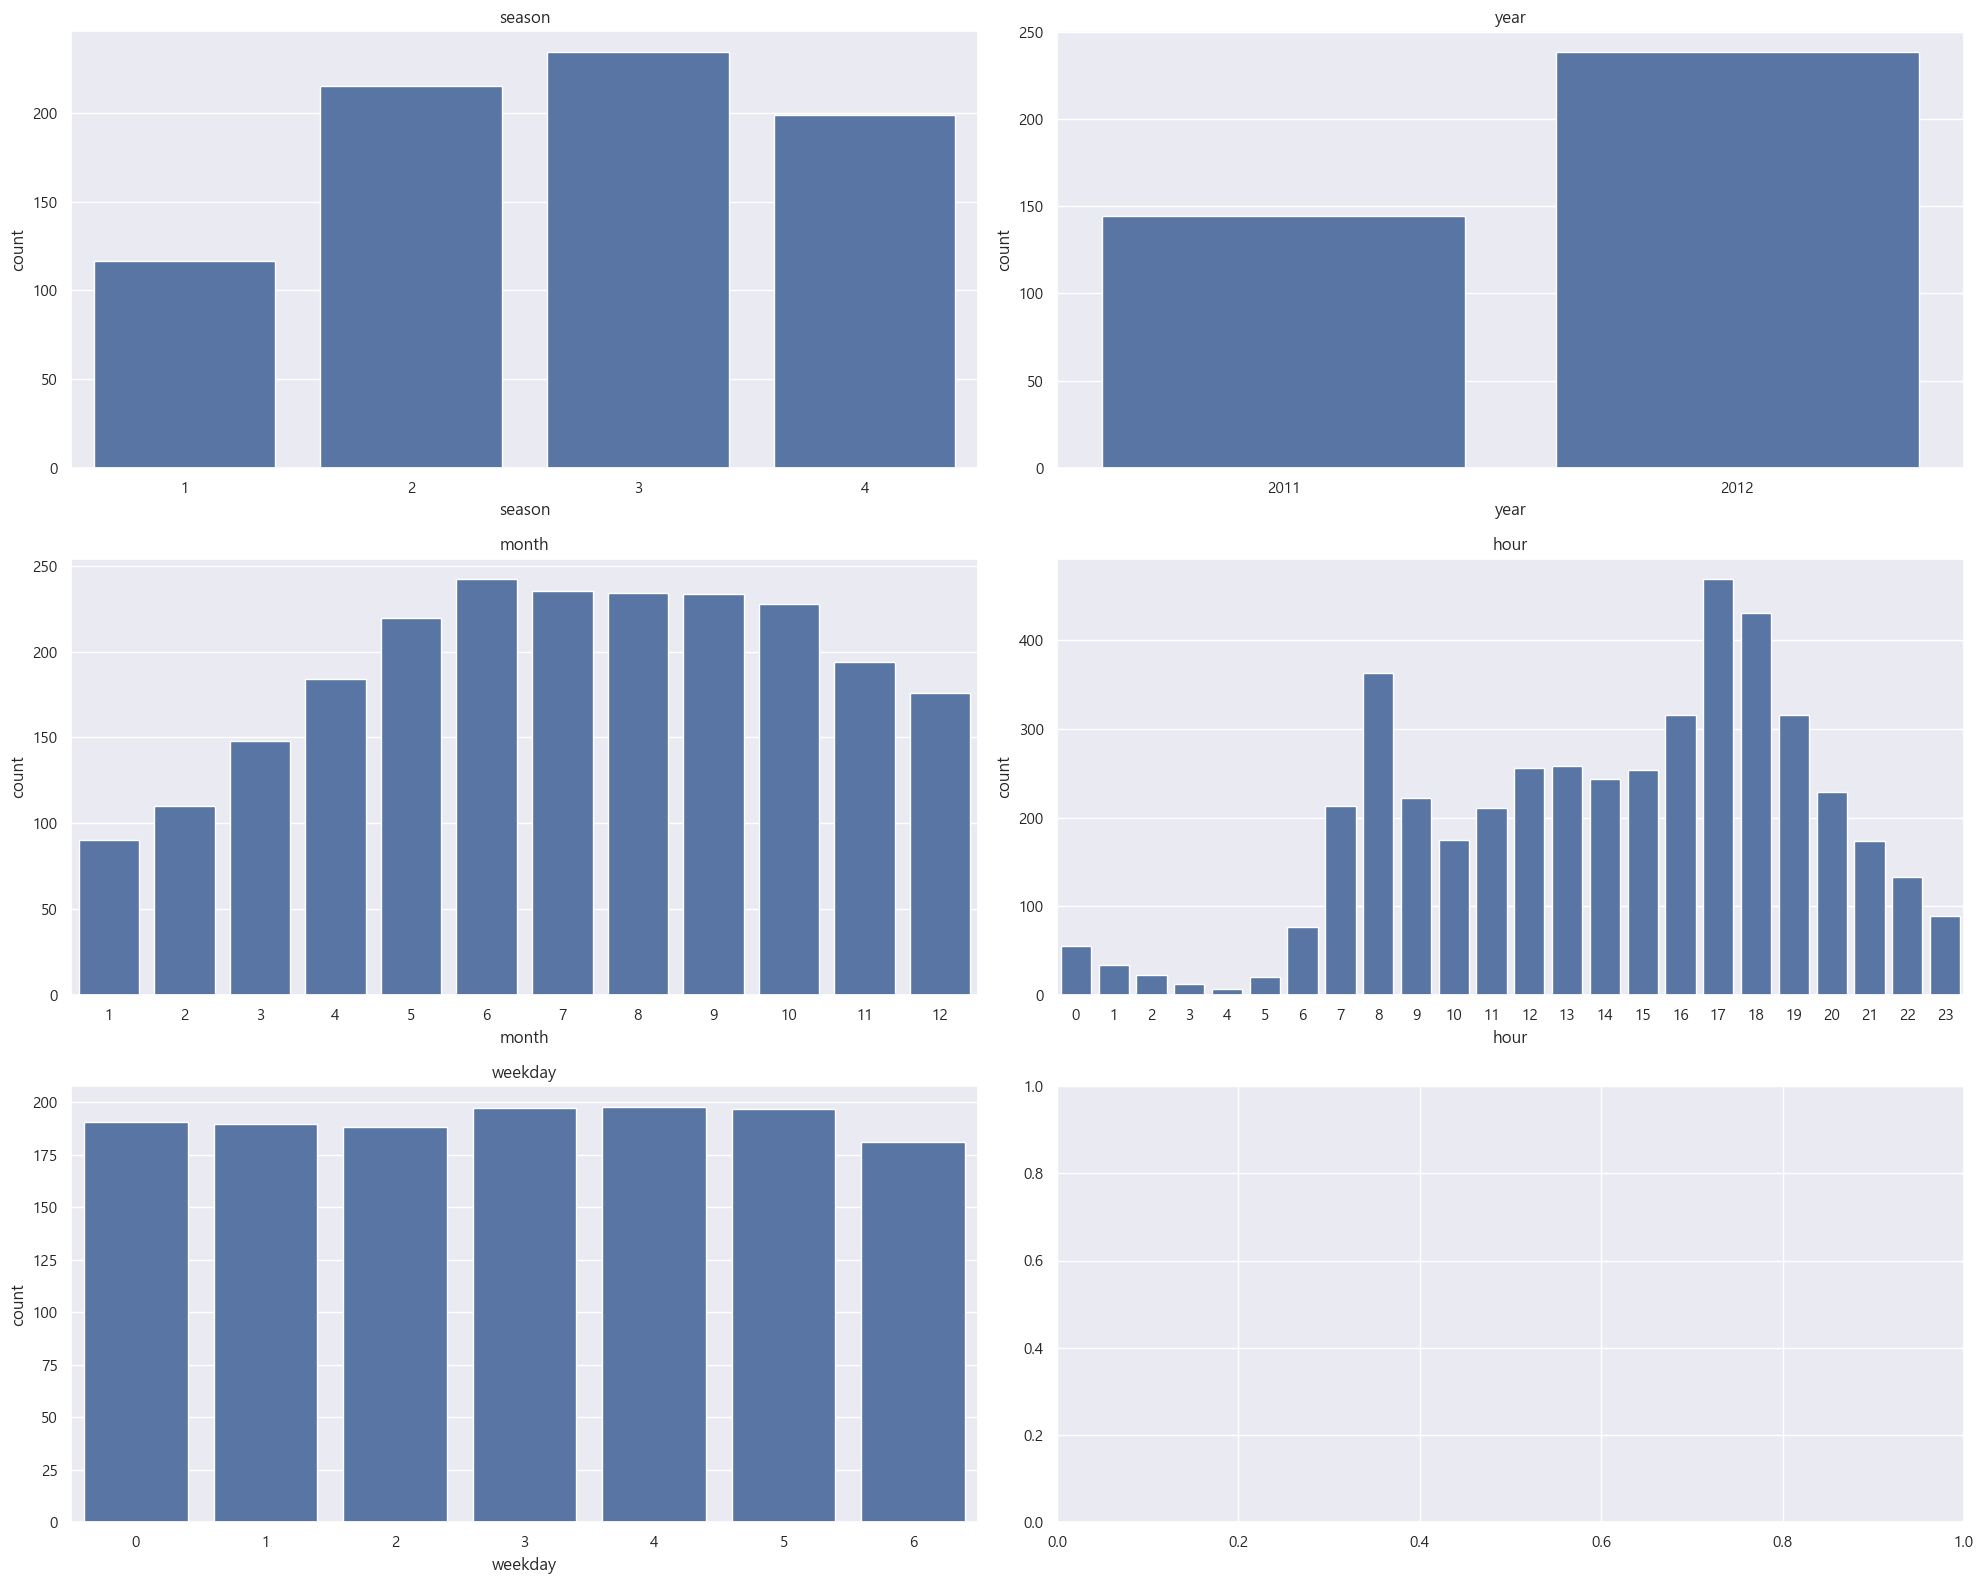

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16)  )
col_list = ['season', 'year', 'month','hour', 'weekday']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.barplot(data=train, x=col, y='count',ax=axes[r][c], errorbar=None)
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

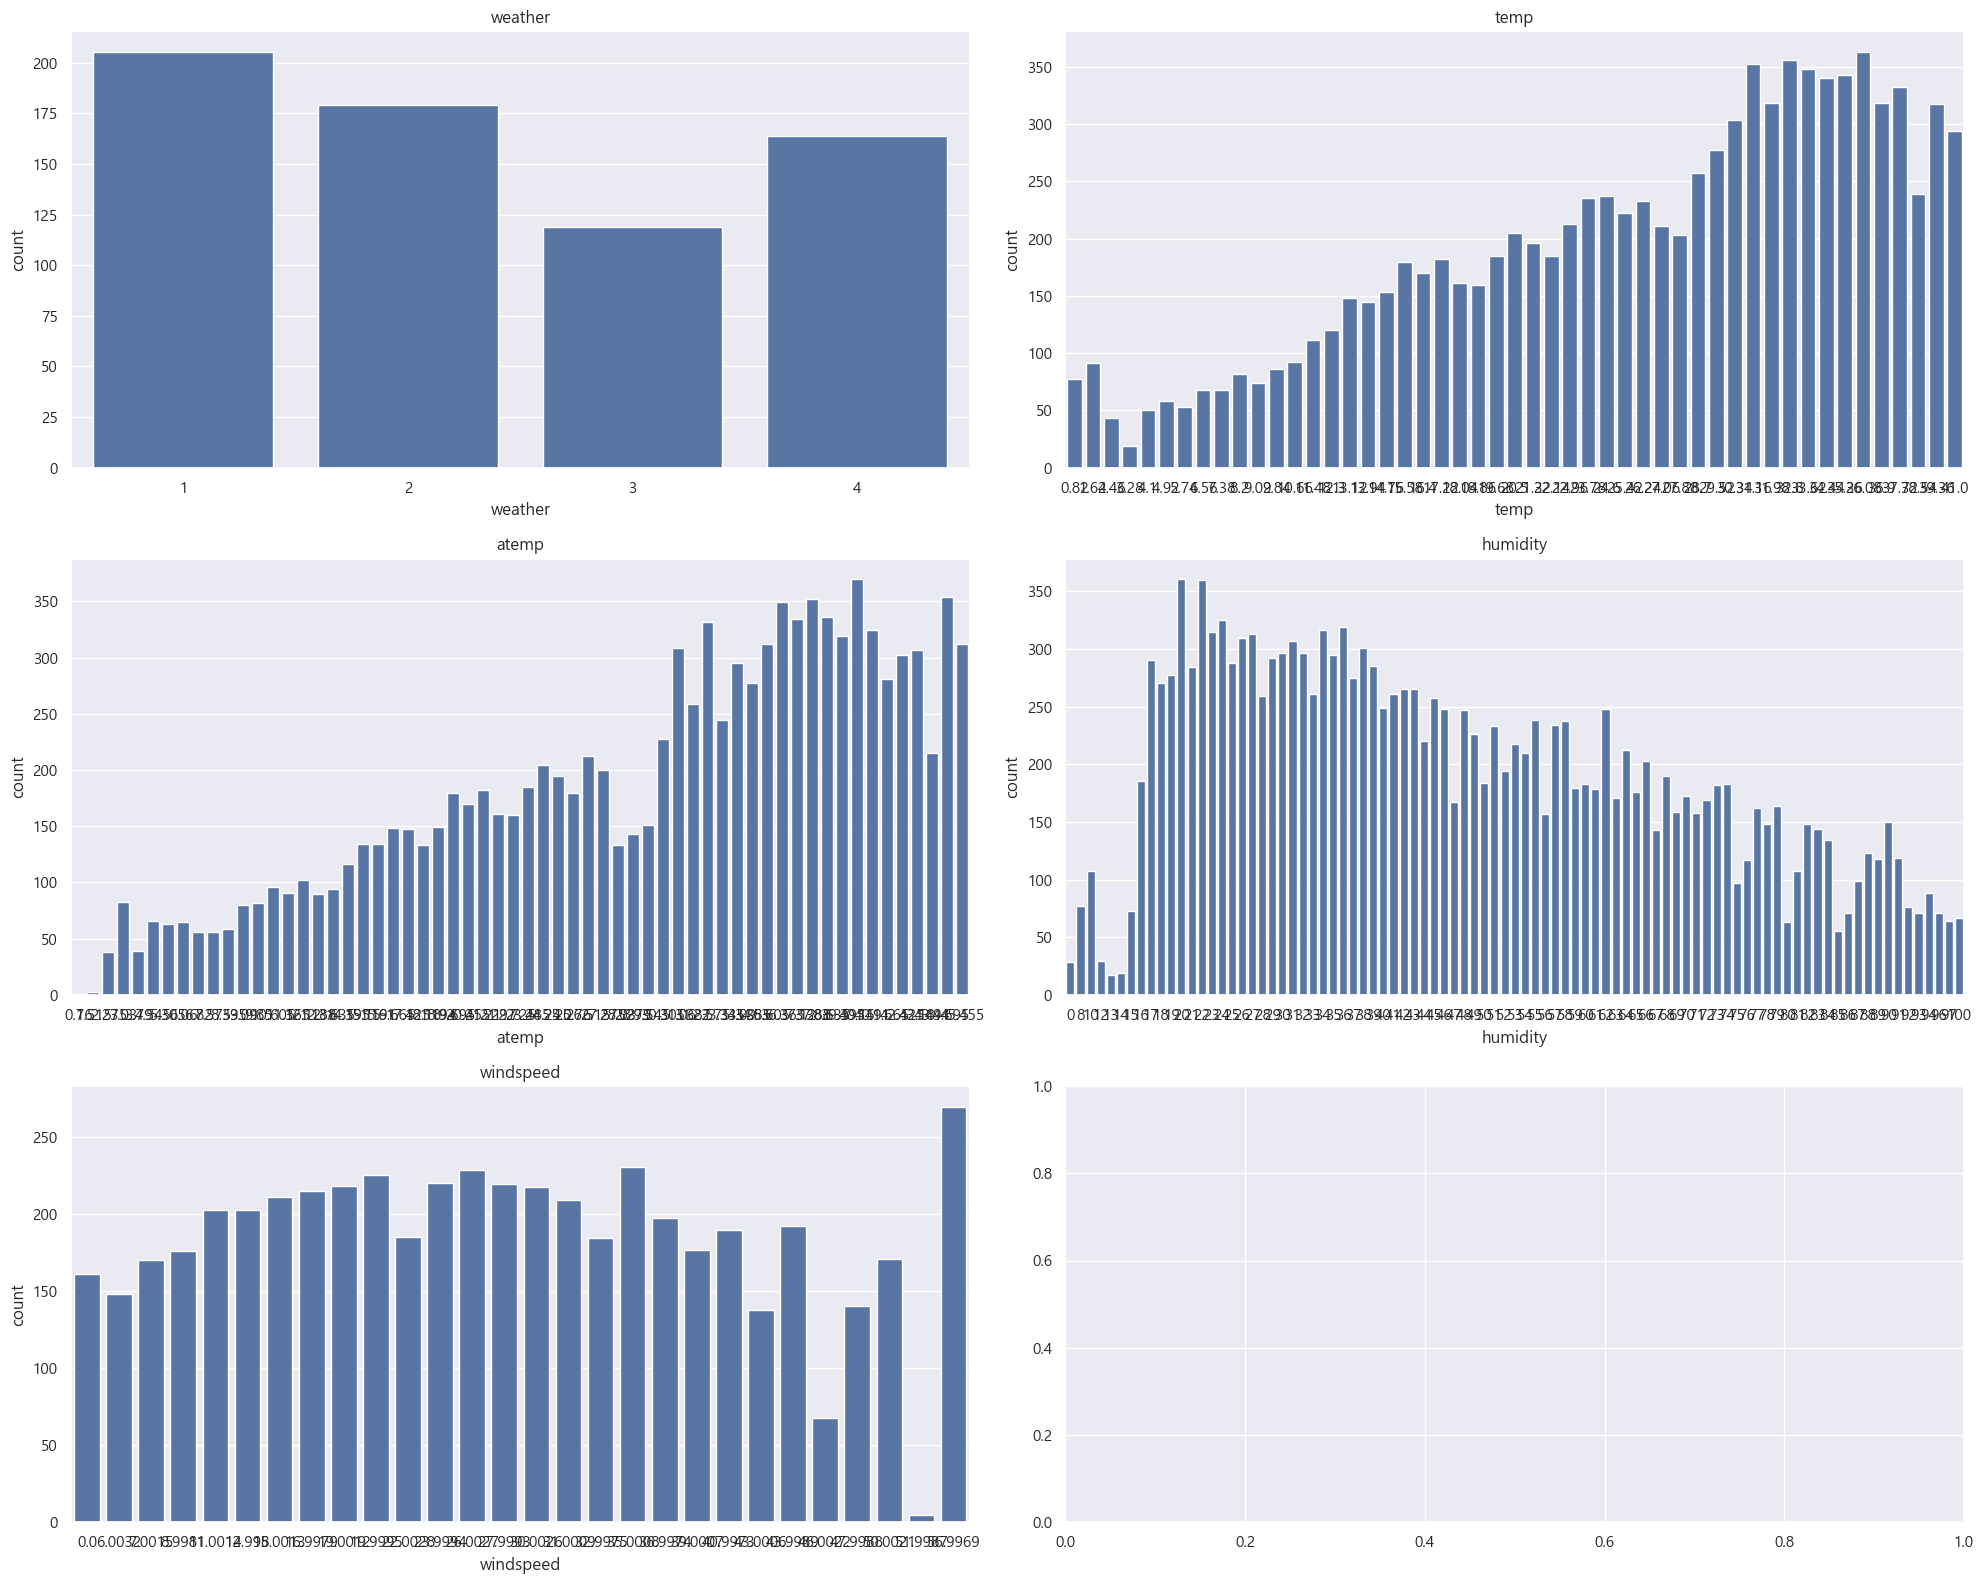

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16)  )
col_list = ['weather', 'temp', 'atemp', 'humidity', 'windspeed']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.barplot(data=train, x=col, y='count',ax=axes[r][c], errorbar=None)
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

In [43]:
train.columns

Index(['rdate', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'week', 'day', 'hour', 'weekday', 'dayofweek'],
      dtype='object')

<Axes: xlabel='hour', ylabel='count'>

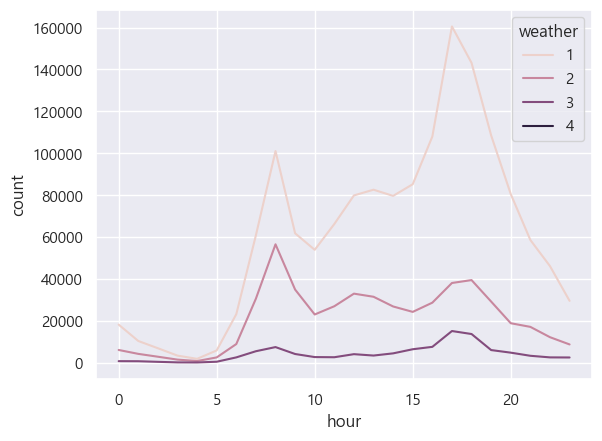

In [49]:
sns.lineplot(data=train, x='hour', y='count', estimator = 'sum',hue='weather', errorbar=None)

<Axes: xlabel='hour', ylabel='count'>

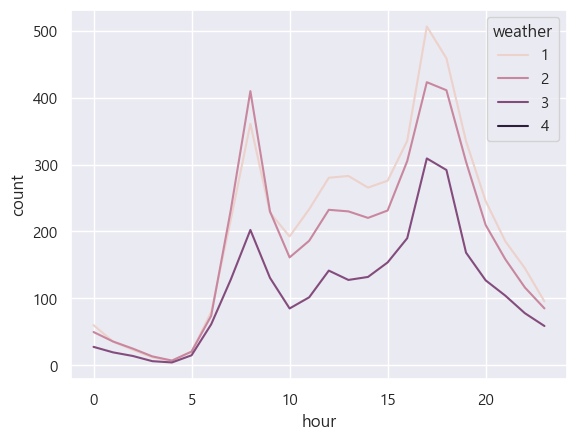

In [50]:
sns.lineplot(data=train, x='hour', y='count', estimator = 'mean',hue='weather', errorbar=None)

In [56]:
train.groupby('weather')['count'].count()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [57]:
train.loc[train['weather']==4, :]

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,week,day,hour,weekday,dayofweek
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,2,9,18,0,0


In [63]:
test.loc[test['weather']==4, :]

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,week,day,hour,weekday,dayofweek
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,4,26,16,2,2
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,3,21,1,5,5


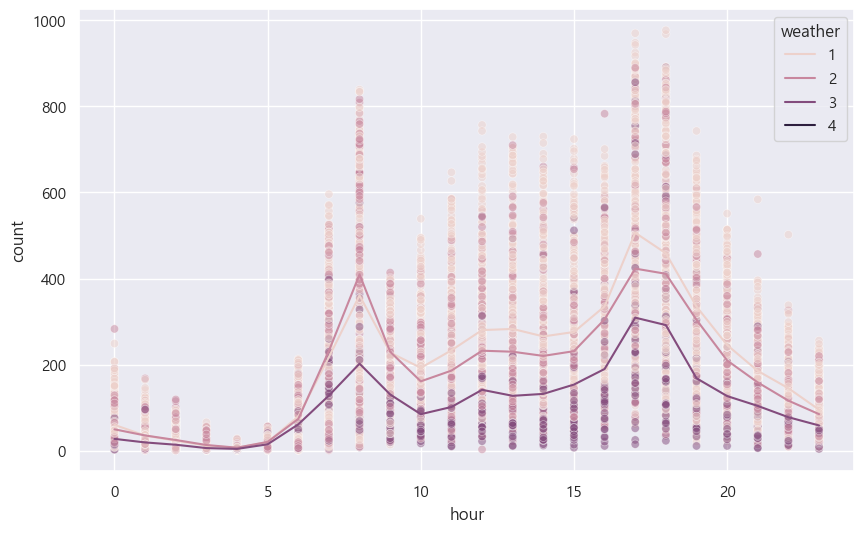

In [53]:
plt.figure(figsize=(10, 6))
# 선 그래프
sns.lineplot(data=train, x='hour', y='count', hue='weather', estimator='mean', errorbar=None)
# 실제 데이터 포인트를 찍어서 weather=4가 어디 있는지 확인
sns.scatterplot(data=train, x='hour', y='count', hue='weather', legend=False, alpha=0.5)
plt.show()

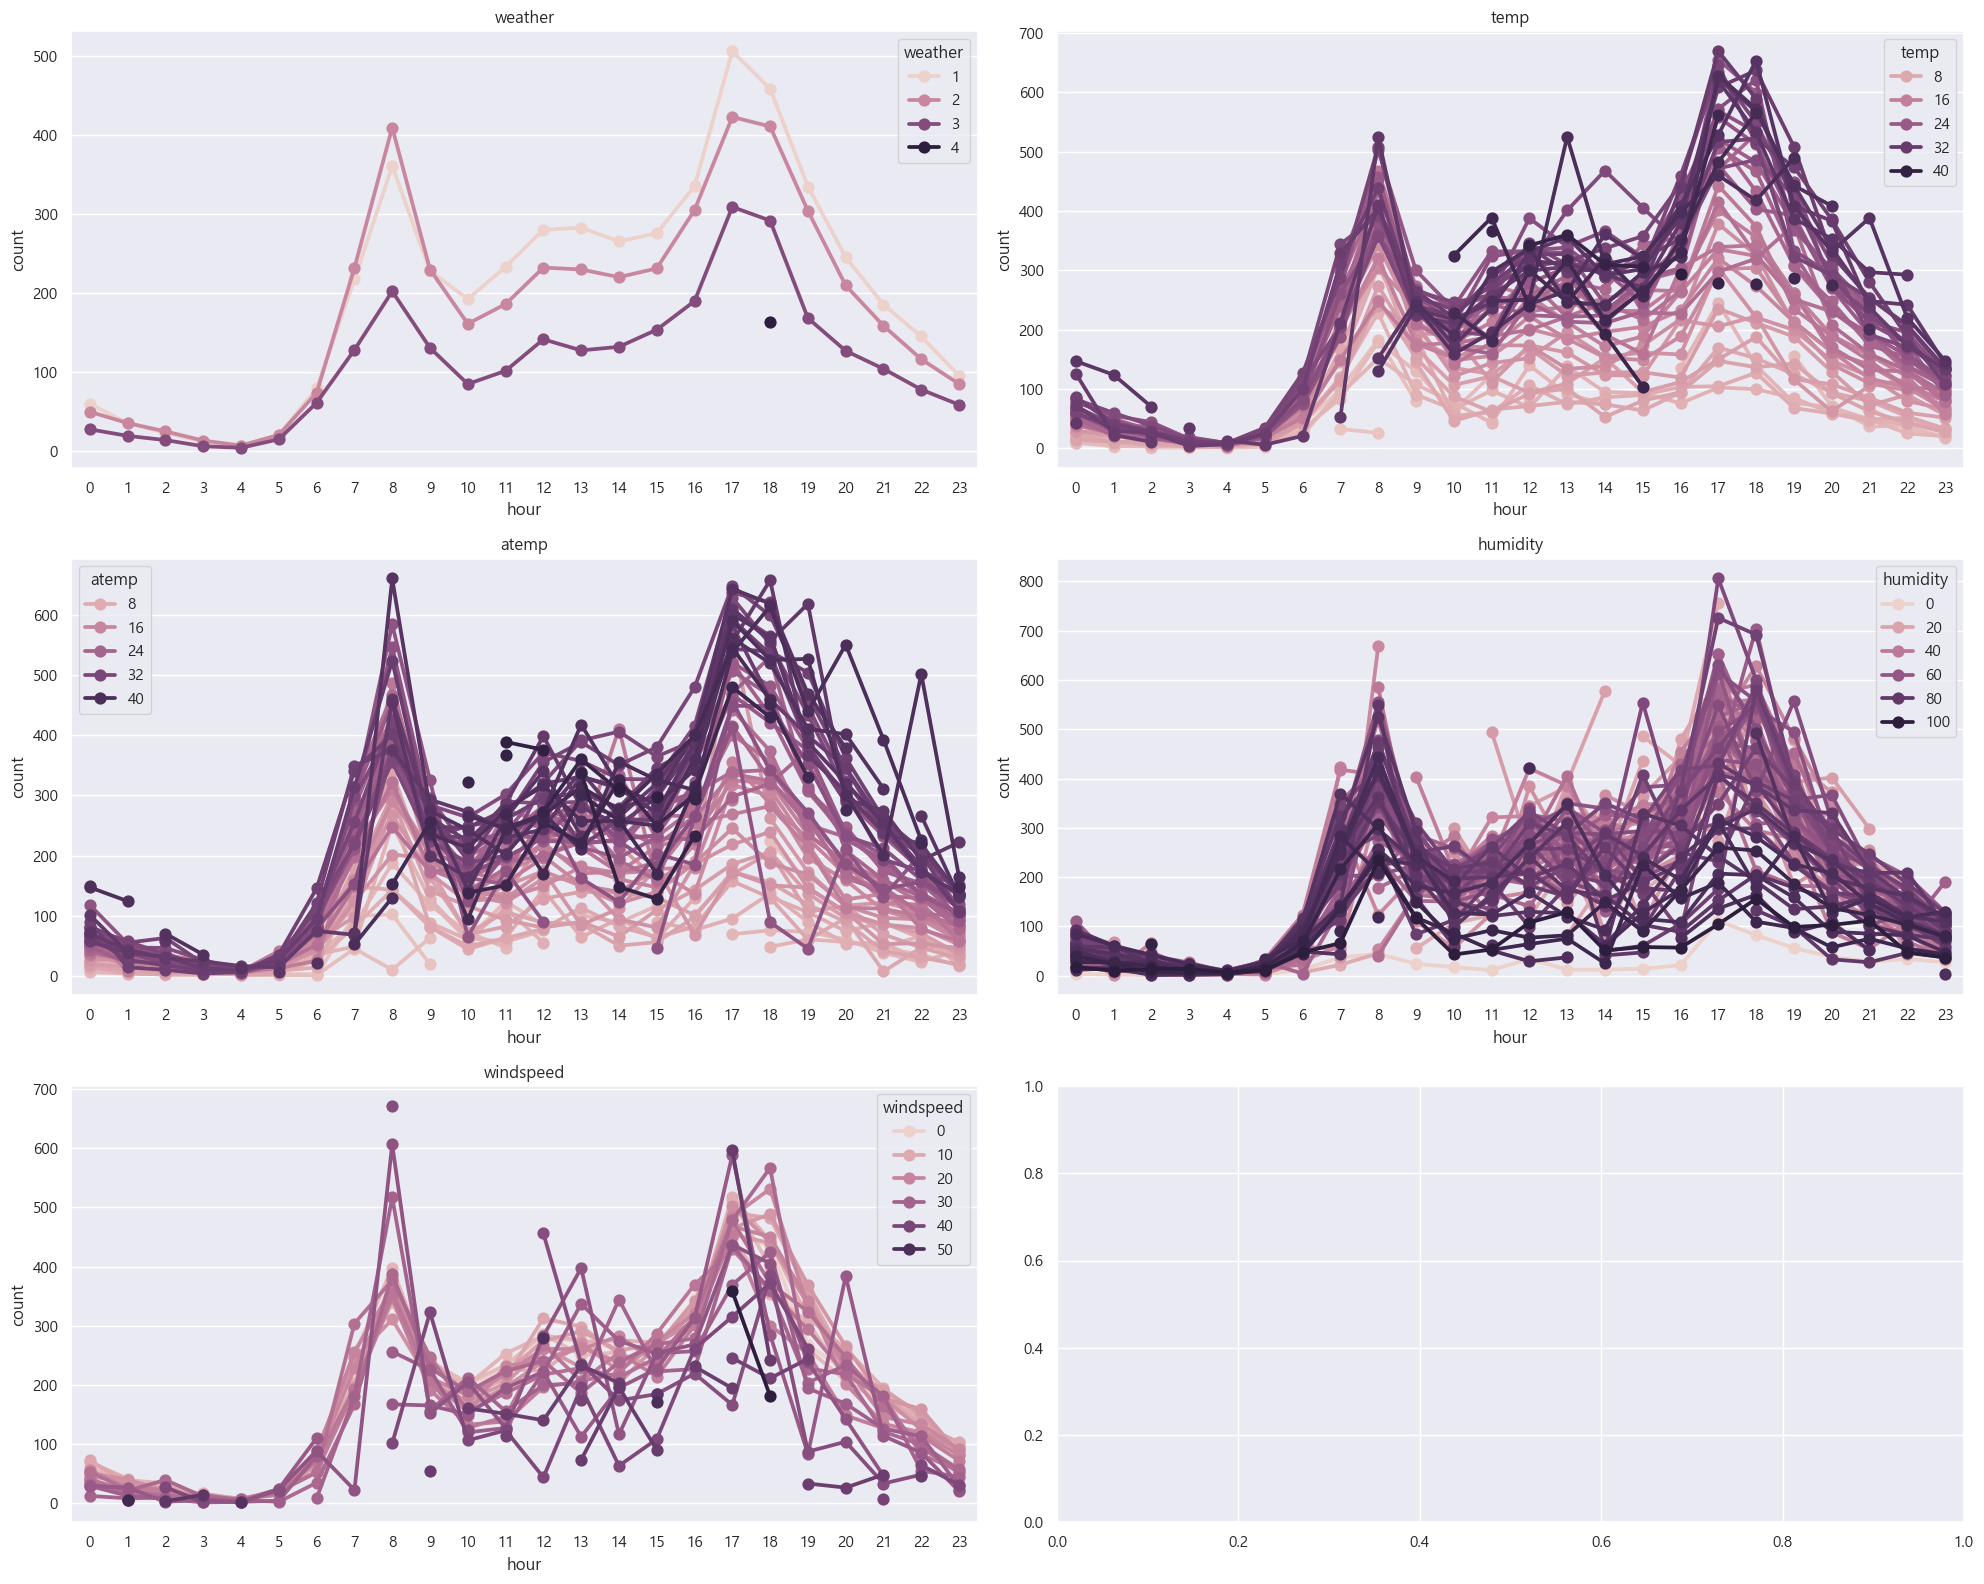

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16)  )
col_list = ['weather', 'temp', 'atemp', 'humidity', 'windspeed']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.pointplot(data=train, x='hour', y='count', hue=col, ax=axes[r][c], errorbar=None)
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

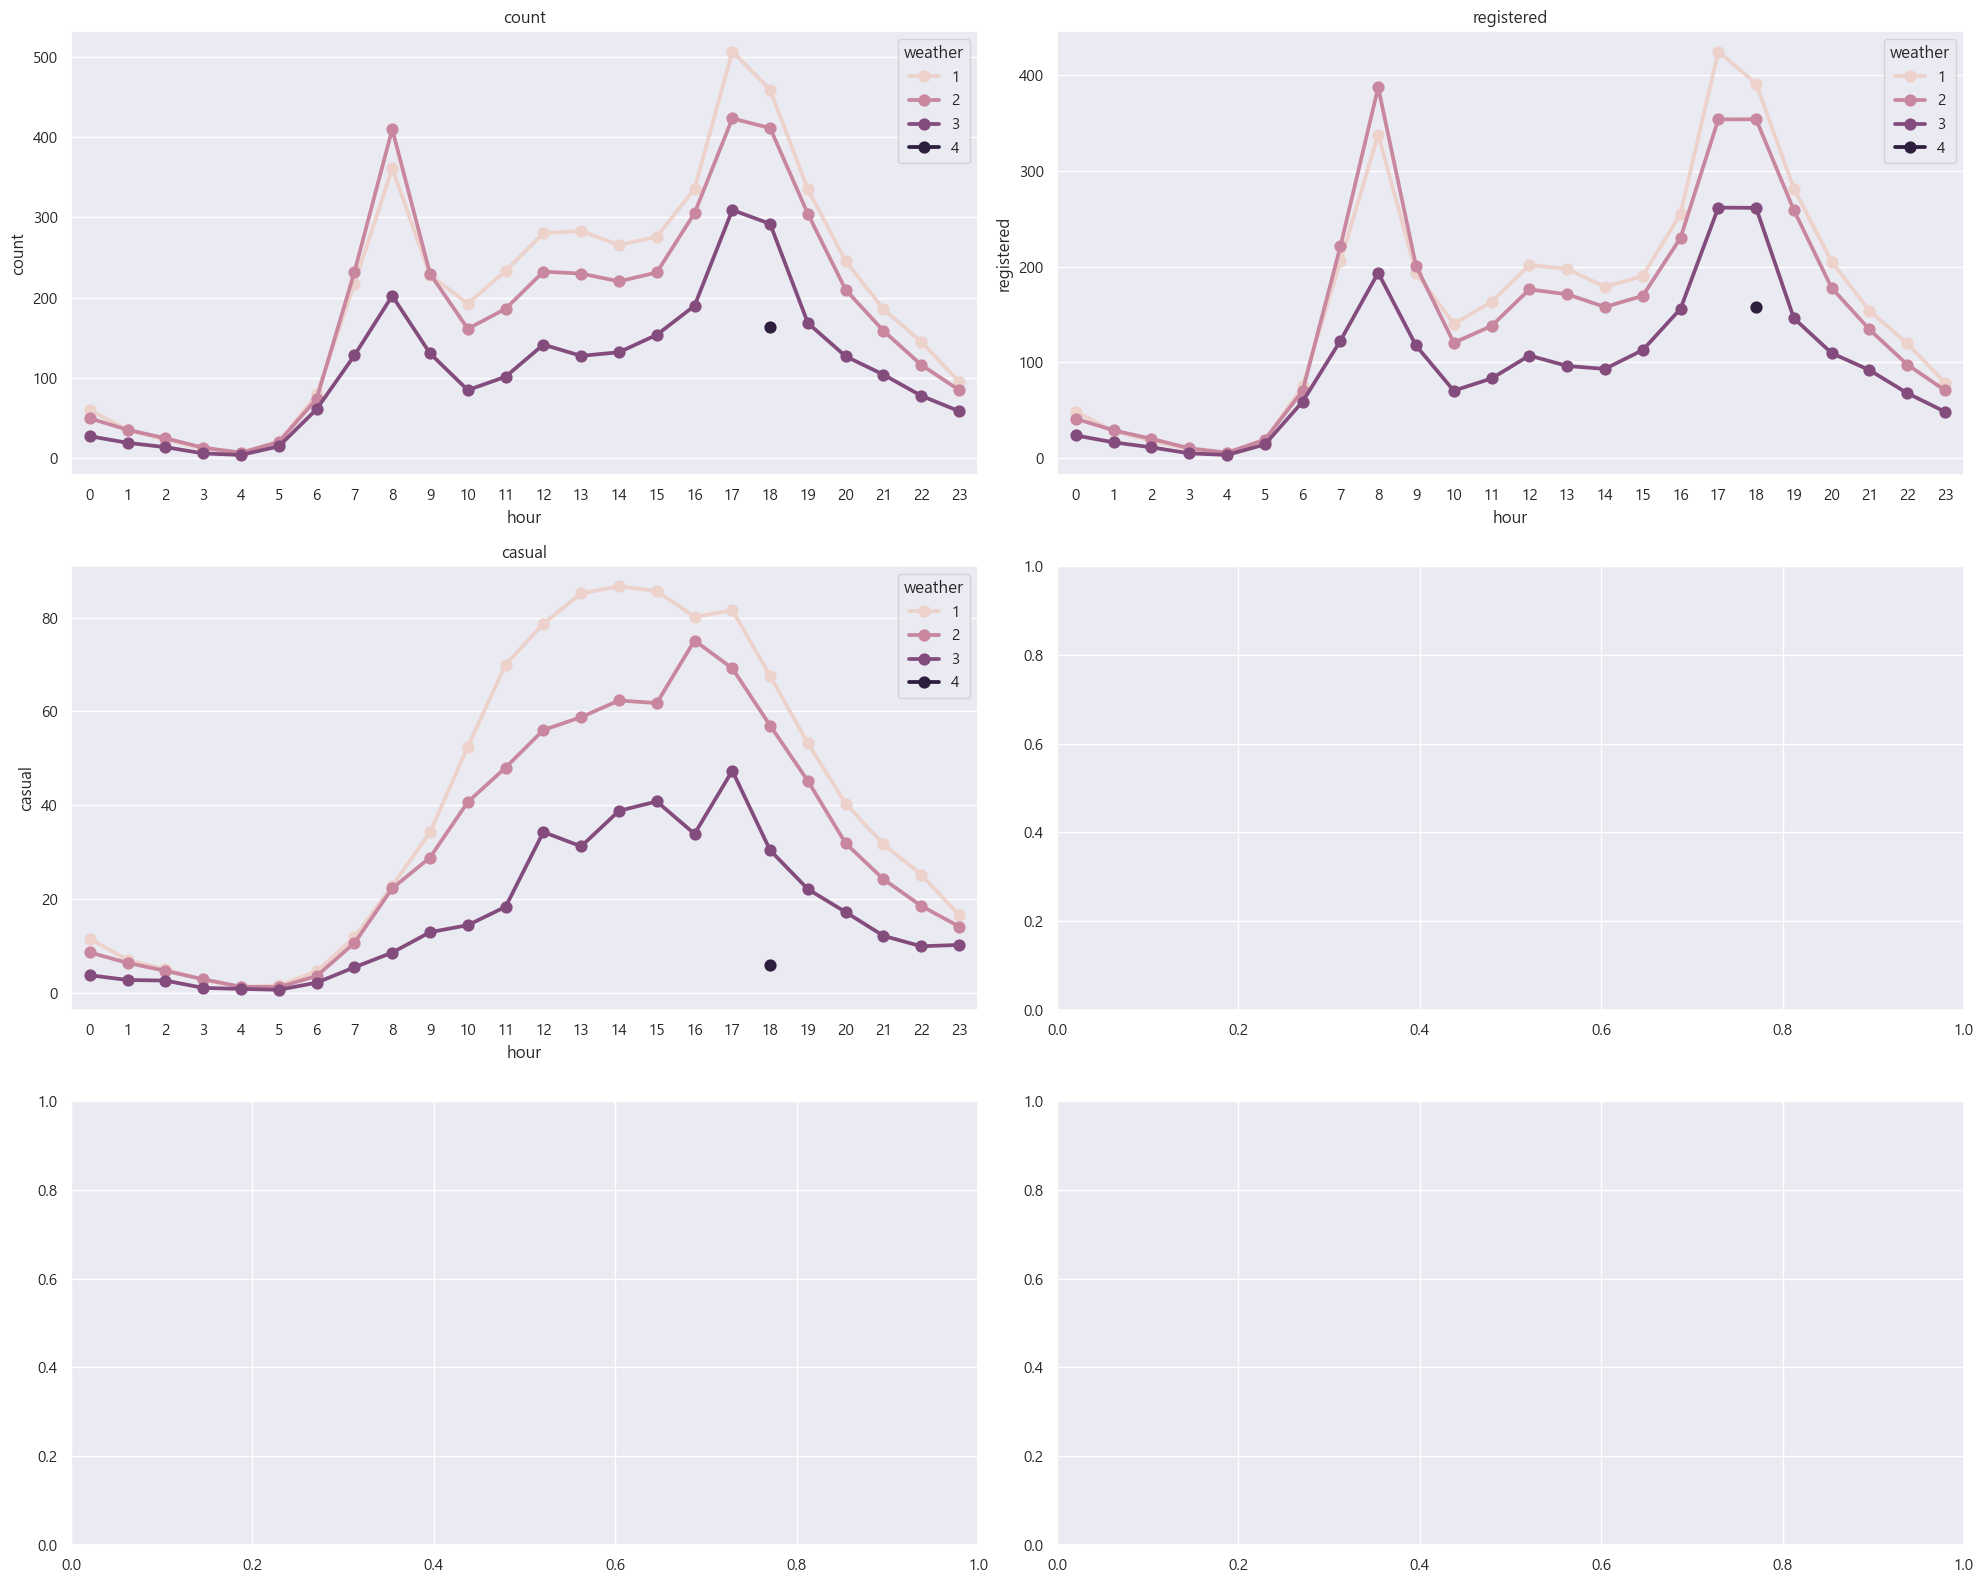

In [62]:
fig, axes = plt.subplots(3, 2, figsize=(20, 16)  )
col_list = ['count', 'registered', 'casual']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.pointplot(data=train, x='hour', y=col, hue='weather', ax=axes[r][c], errorbar=None)
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

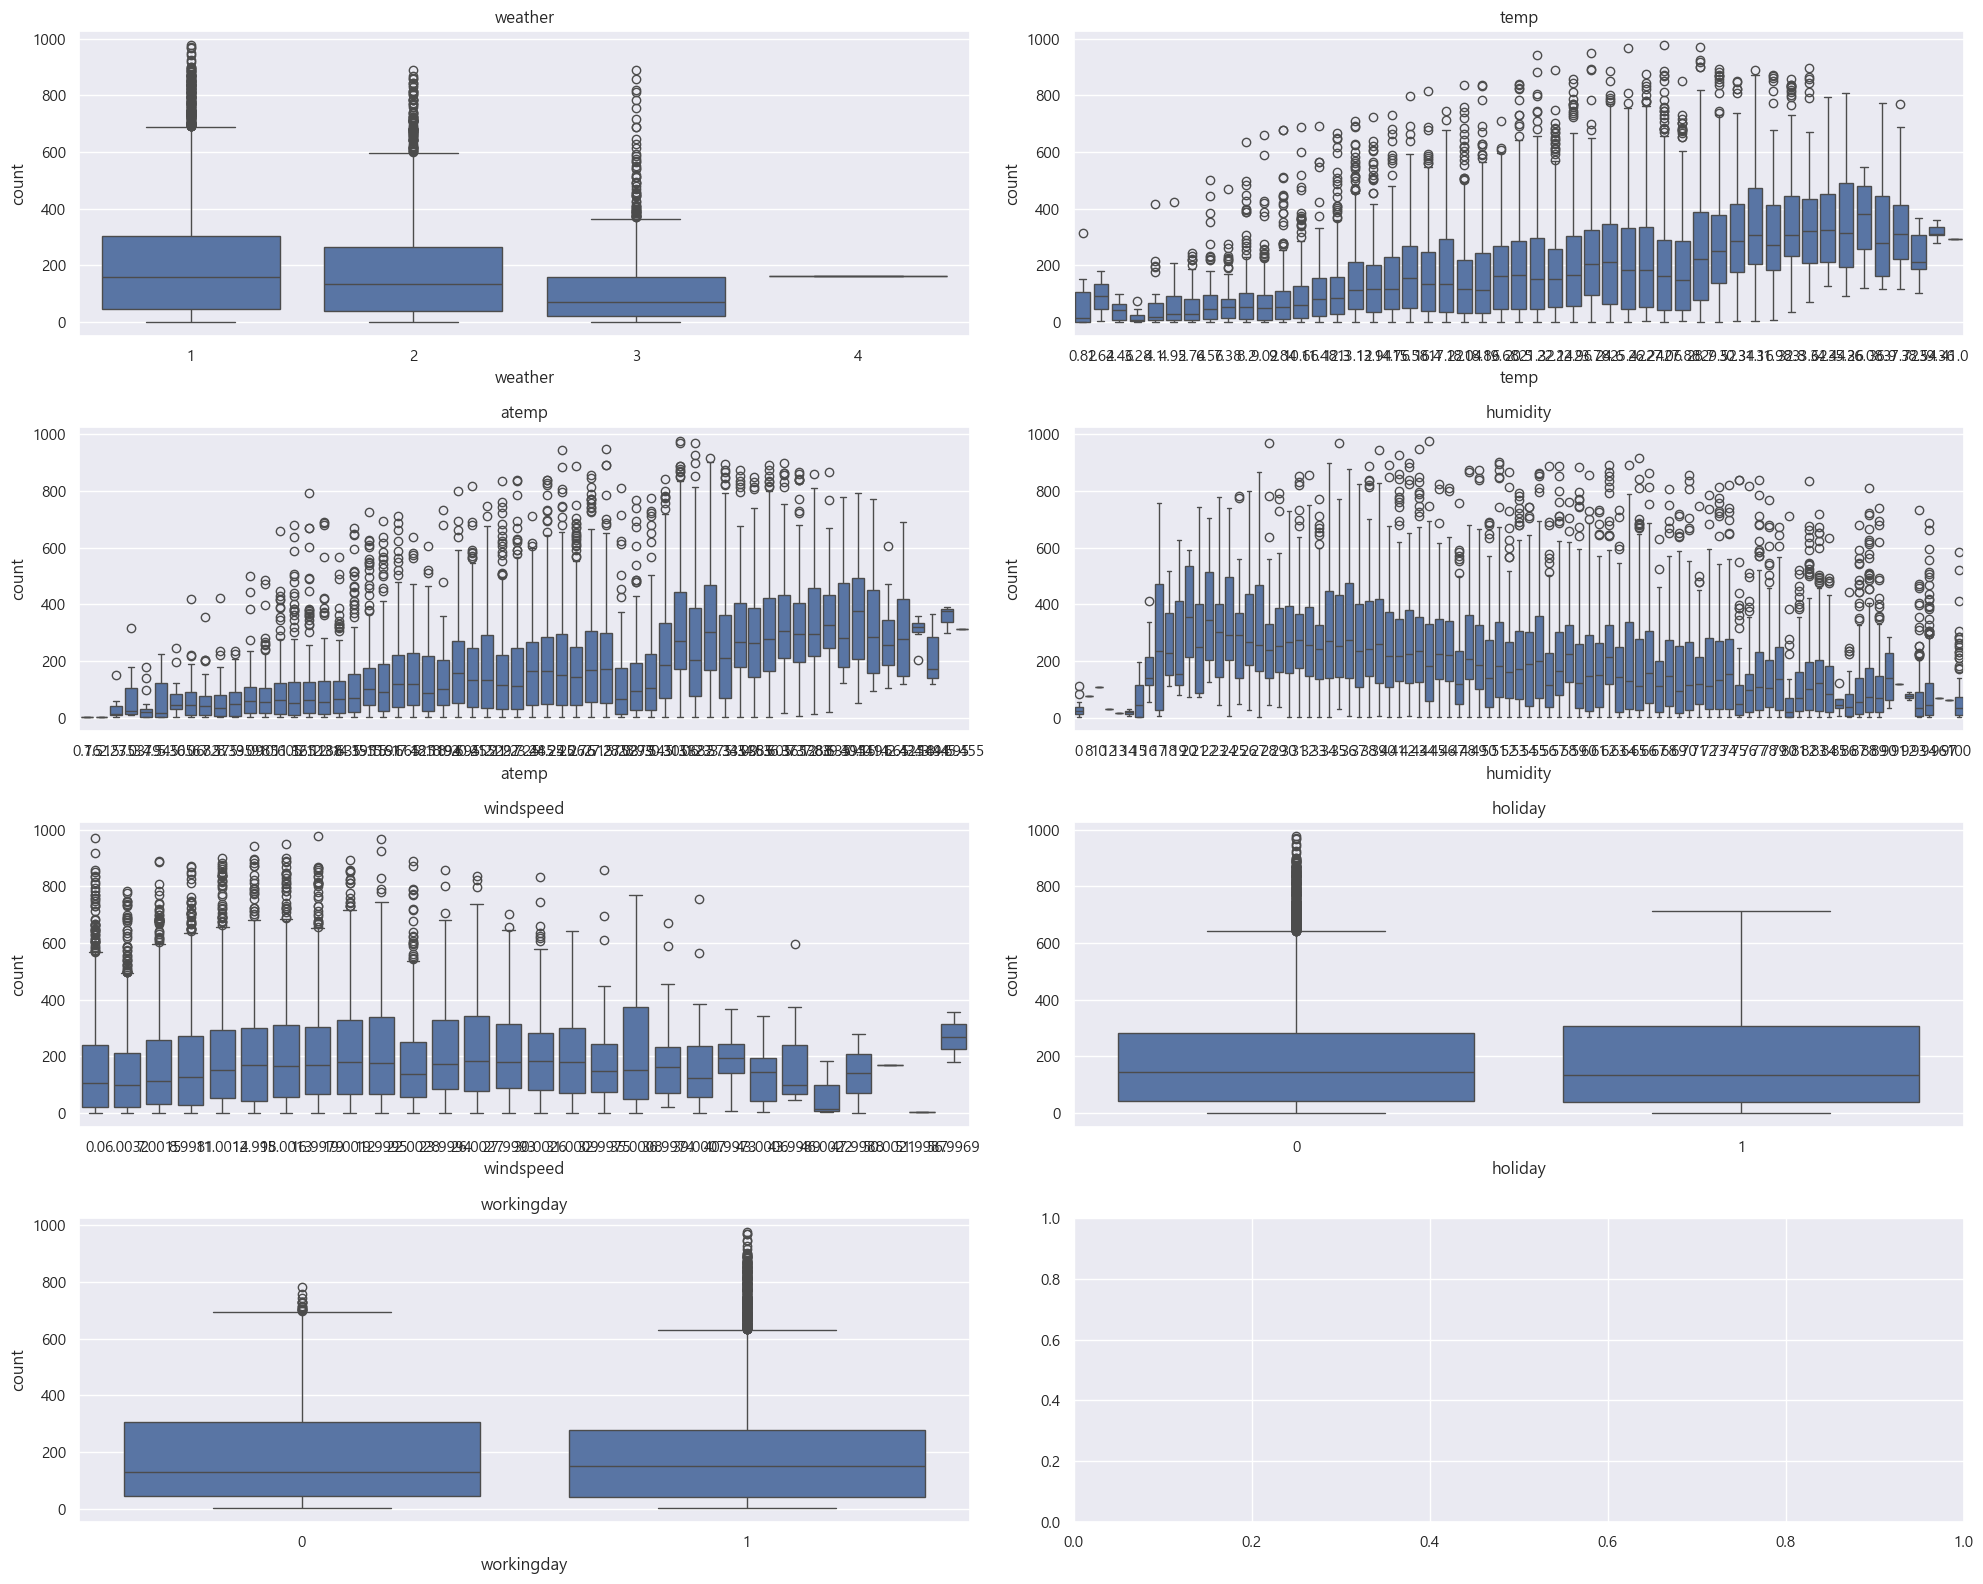

In [68]:
fig, axes = plt.subplots(4, 2, figsize=(20, 16)  )
col_list = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'holiday', 'workingday' ]
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x=col, y='count',  ax=axes[r][c])
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

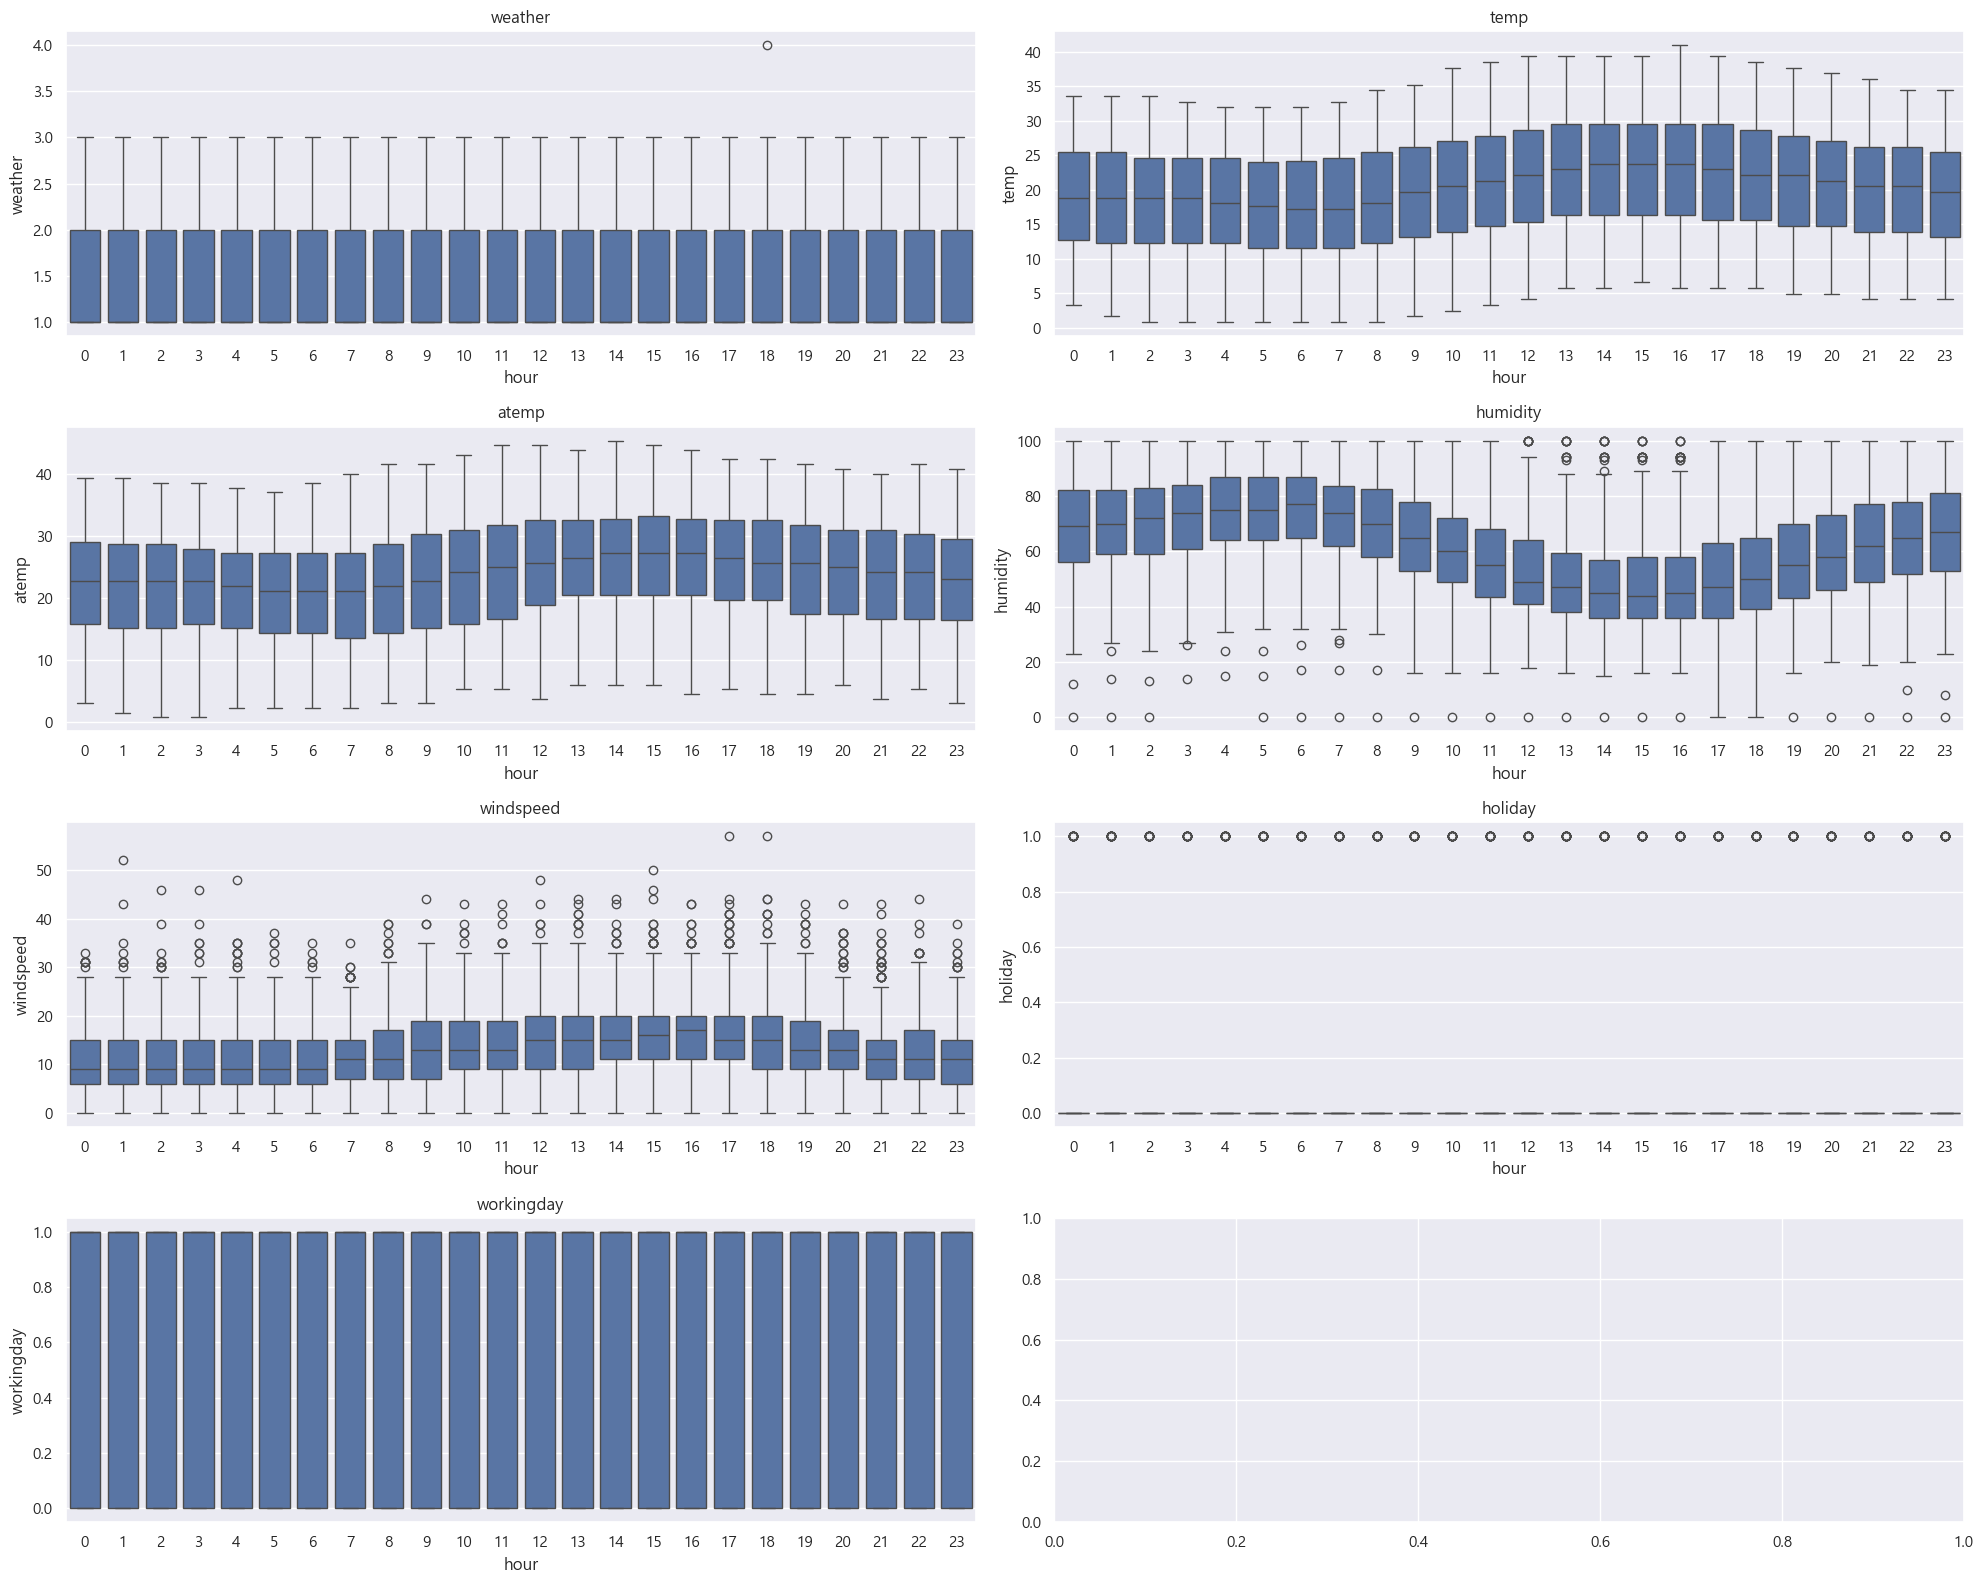

In [70]:
fig, axes = plt.subplots(4, 2, figsize=(20, 16)  )
col_list = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'holiday', 'workingday' ]
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x = 'hour', y=col,  ax=axes[r][c])
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

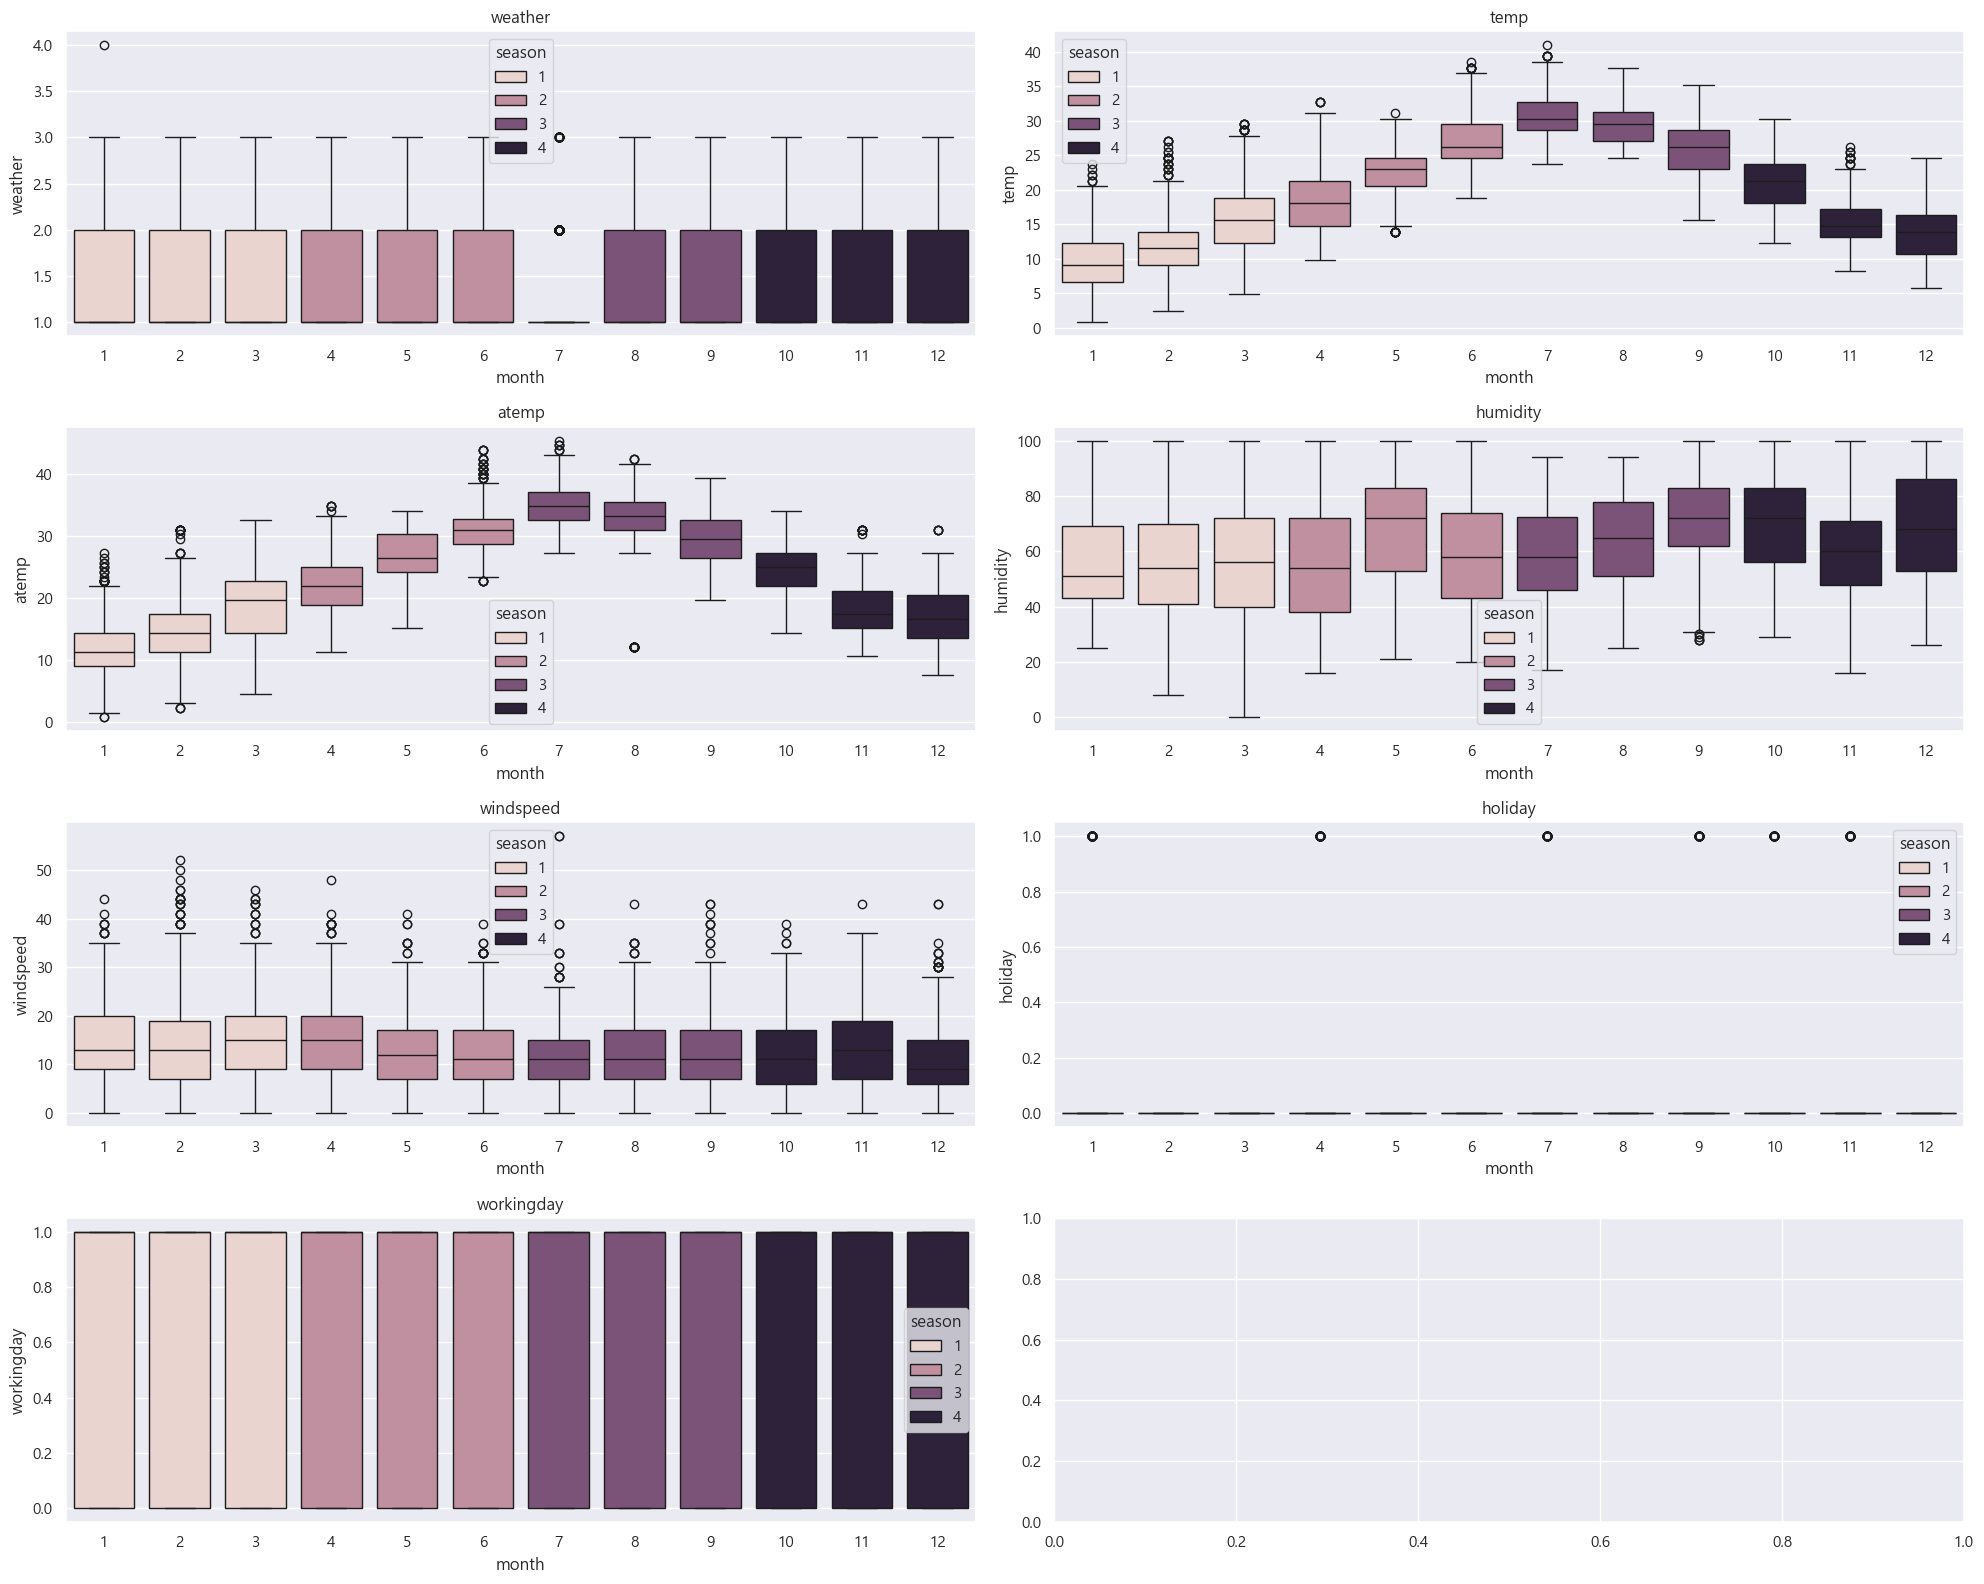

In [71]:
fig, axes = plt.subplots(4, 2, figsize=(20, 16)  )
col_list = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'holiday', 'workingday' ]
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//2
    c = i%2
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x = 'month', y=col, hue = 'season' , ax=axes[r][c])
    # axes[0][0].set_title("count")
    # sns.histplot(data=train, x='count', ax=axes[0][0],     kde=True )
plt.tight_layout()
plt.show()

<Axes: ylabel='windspeed'>

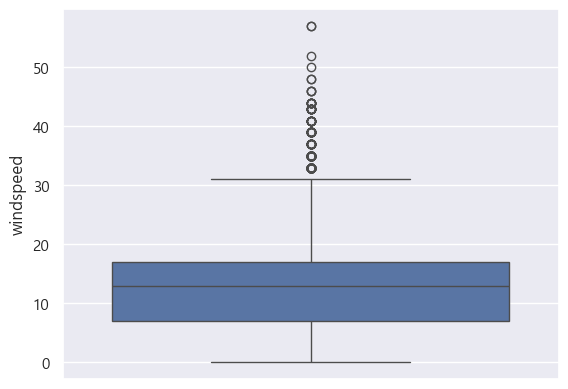

In [72]:
sns.boxplot(data=train, y='windspeed')

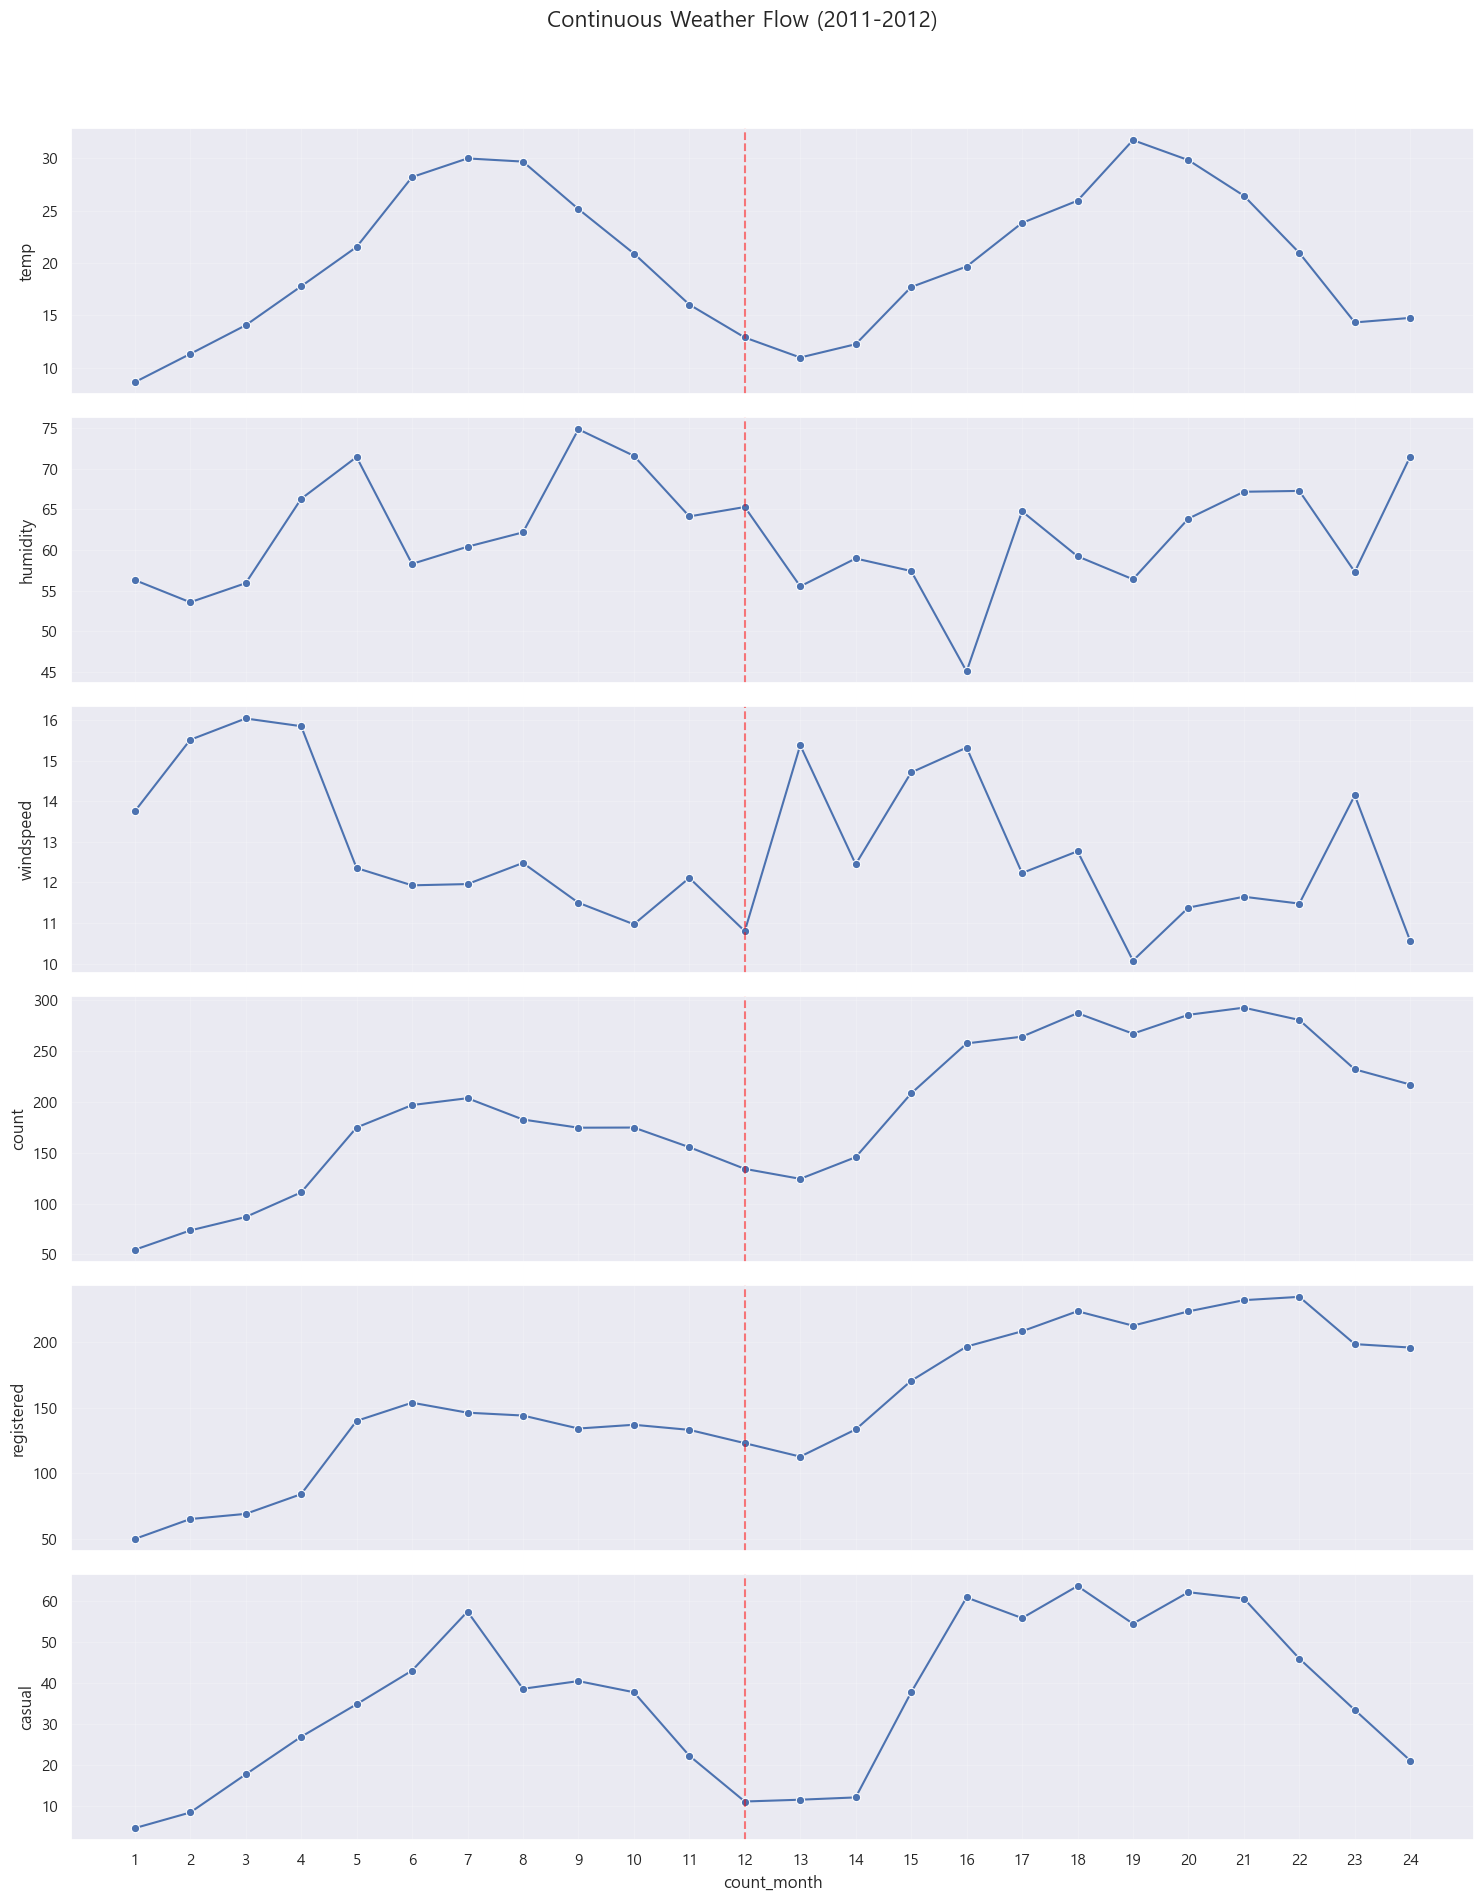

In [96]:
# 3개의 행을 가진 서브플롯 생성
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20), sharex=True)

cols = ['temp', 'humidity', 'windspeed', 'count', 'registered', 'casual']

for i, col in enumerate(cols):
    sns.lineplot(data=train, x='count_month', y=col, estimator='mean', 
                 errorbar=None, ax=axes[i], marker='o')
    axes[i].set_ylabel(col)
    axes[i].axvline(12, color='red', linestyle='--', alpha=0.5) # 12월 경계선
    axes[i].grid(True, alpha=0.2)

plt.suptitle("Continuous Weather Flow (2011-2012)", fontsize=16)
plt.xticks(range(1, 25))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('my_plot.png')
plt.show()


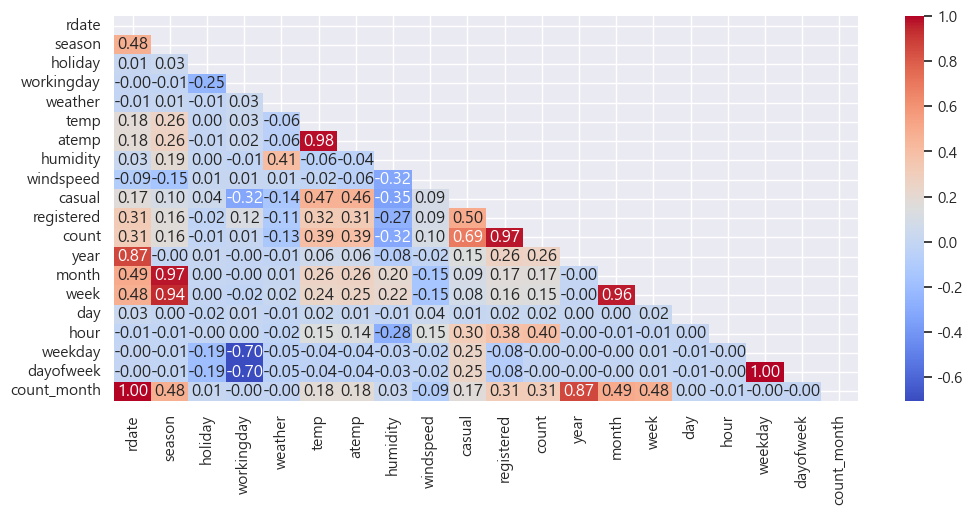

In [98]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
sns.heatmap(train.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()


<pre><b><font size=5 color=red>약  (0.3~0.7은 보통)   강
다중공선성(Multicollinearity)
    회귀 분석에서 독립 변수들 간에 강한 선형 상관관계로 모델 불안정
    강한 상관관계 > 0.9  
    1) 둘 중 하나는 버려라
    2) 둘을 합쳐라
    3) 주성분 분석(PCA: Principal Component Analysis))